## 📌 Dataset Description

This dataset contains over **40,000 customer orders from various marketplaces across Brazil**.  
It provides detailed information about **customer purchases, store characteristics, promotional campaigns, and geographical data**.

The data is divided into **4 separate training subsets** (`train_subset_{i}.csv`, where *i* = 1–4) and **1 test set** (`test.csv`).  
A `sample_submission.csv` file is also provided as a reference for the correct submission format.

### 📝 Features Overview
- **Customer & Order Data**: Person Description, Customer Order, Yearly Income, Review Score  
- **Store Data**: Store Kind, Store Cost, Store Sales, Store Area (and dedicated sections like Grocery/Frozen/Meat)  
- **Product & Packaging Data**: Gross Weight, Net Weight, Package Weight, Is Recyclable?  
- **Geographical Data**: Customer/Seller City, State, Latitude, Longitude  
- **Promotional & Market Features**: Promotion Name, Additional Features in market  
- **Target Variable**: `Cost` (Total cost of the order)

### ⚠️ Important Notice
- The dataset contains **intentional data quality issues** (e.g., missing values, inconsistent formats, noisy entries) to mimic **real-world scenarios**.  
- **Cleaning and standardizing the data is a crucial part of this challenge** and will have a major impact on the final results.  
- The **4 training subsets must be standardized and combined** before modeling. The test set represents an **additional unseen batch** with similar issues.


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import fuzz, process
import warnings
warnings.filterwarnings("ignore")

# 1.Get the data

In [ ]:
df1 = pd.read_csv('/content/train_subset_1.csv')
df2 = pd.read_csv('/content/train_subset_2_renamed.csv')
df3 = pd.read_csv('/content/train_subset_3_renamed.csv')
df4 = pd.read_csv('/content/cleaned_train_data.csv')
test_df = pd.read_csv('/content/test.csv')

# 2. Explore the data

In [ ]:
df1.columns

Index(['unnamed:0', 'personDescription', 'min.YearlyIncome', 'customerOrder',
       'grossWeight', 'netWeight', 'isRecyclable?',
       'additionalFeaturesInMarket', 'promotionName', 'storeKind',
       'storeSales', 'storeCost', 'groceryArea', 'frozenArea', 'meatArea',
       'cost', 'customer_city', 'customer_state', 'customer_lat',
       'customer_lng', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'review_score'],
      dtype='object')

In [ ]:
df2.columns

Index(['id', 'person_description', 'yearly_income', 'customer_order',
       'is_recyclable?', 'additional_features_in_market', 'promotion_name',
       'store_kind', 'store_sales', 'store_cost', 'grocery_area', 'store_area',
       'frozen_area', 'meat_area', 'cost', 'customer_city', 'customer_state',
       'customer_lat', 'customer_lng', 'seller_city', 'seller_state',
       'seller_lat', 'seller_lng', 'review_score', 'gross_weight',
       'net_weight', 'package_weight'],
      dtype='object')

In [ ]:
df3.columns

Index(['id', 'person_description', 'yearly_income', 'customer_order',
       'gross_weight', 'net_weight', 'package_weight', 'is_recyclable?',
       'additional_features_in_market', 'promotion_name', 'store_kind',
       'store_sales', 'store_cost', 'grocery_area', 'store_area',
       'frozen_area', 'meat_area', 'cost', 'customer_city', 'customer_state',
       'customer_lat', 'customer_lng', 'seller_city', 'seller_state',
       'seller_lat', 'seller_lng', 'review_score'],
      dtype='object')

In [ ]:
df4.columns

Index(['id', 'person_description', 'yearly_income', 'customer_order',
       'gross_weight', 'net_weight', 'is_recyclable_field',
       'additional_features_in_market', 'promotion_name', 'store_kind',
       'store_sales', 'store_cost', 'grocery_area', 'store_area',
       'frozen_area', 'meat_area', 'metric_cost', 'customer_city',
       'customer_state', 'customer_lat', 'customer_lng', 'seller_city',
       'seller_state', 'seller_lat', 'seller_lng', 'review_score'],
      dtype='object')

We notice there is a big diffrent in columns names so we will rename them in right way like test file

### Rename the columns

In [ ]:
column_mapping = {
    # IDs
    "unnamed:0": "ID",
    "id": "ID",
    "ID": "ID",

    "personDescription": "Person Description",
    "person_description": "Person Description",
    "Person Description": "Person Description",

    "min.YearlyIncome": "Yearly Income",
    "yearly_income": "Yearly Income",
    "Yearly Income": "Yearly Income",

    # order
    "customerOrder": "Customer Order",
    "customer_order": "Customer Order",
    "Customer Order": "Customer Order",

    "grossWeight": "Gross Weight",
    "gross_weight": "Gross Weight",
    "Gross Weight": "Gross Weight",

    "netWeight": "Net Weight",
    "net_weight": "Net Weight",
    "Net Weight": "Net Weight",

    "package_weight": "Package Weight",
    "Package Weight": "Package Weight",

    "isRecyclable?": "Is Recyclable?",
    "is_recyclable?": "Is Recyclable?",
    "is_recyclable_field": "Is Recyclable?",
    "Is Recyclable?": "Is Recyclable?",

    # features
    "additionalFeaturesInMarket": "Additional Features in market",
    "additional_features_in_market": "Additional Features in market",
    "Additional Features in market": "Additional Features in market",

    # promotion
    "promotionName": "Promotion Name",
    "promotion_name": "Promotion Name",
    "Promotion Name": "Promotion Name",

    # store
    "storeKind": "Store Kind",
    "store_kind": "Store Kind",
    "Store Kind": "Store Kind",

    "storeSales": "Store Sales",
    "store_sales": "Store Sales",
    "Store Sales": "Store Sales",

    "storeCost": "Store Cost",
    "store_cost": "Store Cost",
    "Store Cost": "Store Cost",

    "store_area": "Store Area",
    "Store Area": "Store Area",

    "groceryArea": "Grocery Area",
    "grocery_area": "Grocery Area",
    "Grocery Area": "Grocery Area",

    "frozenArea": "Frozen Area",
    "frozen_area": "Frozen Area",
    "Frozen Area": "Frozen Area",

    "meatArea": "Meat Area",
    "meat_area": "Meat Area",
    "Meat Area": "Meat Area",

    # target
    "cost": "cost",
    "metric_cost": "cost",

    # location
    "customer_city": "customer_city",
    "customer_state": "customer_state",
    "customer_lat": "customer_lat",
    "customer_lng": "customer_lng",

    "seller_city": "seller_city",
    "seller_state": "seller_state",
    "seller_lat": "seller_lat",
    "seller_lng": "seller_lng",

    "review_score": "review_score"
}


In [ ]:
# We create a function that standrize the column name
def standardize_columns(df, mapping):
    df = df.rename(columns=lambda x: x.strip())
    df = df.rename(columns=mapping)
    return df

In [ ]:
dfs = [df1, df2, df3, df4, test_df]
dfs = [standardize_columns(d, column_mapping) for d in dfs]
train_df = pd.concat(dfs[:-1], axis=0, ignore_index=True)

In [ ]:
train_df.columns

Index(['ID', 'Person Description', 'Yearly Income', 'Customer Order',
       'Gross Weight', 'Net Weight', 'Is Recyclable?',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Grocery Area', 'Frozen Area', 'Meat Area',
       'cost', 'customer_city', 'customer_state', 'customer_lat',
       'customer_lng', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'review_score', 'Store Area', 'Package Weight'],
      dtype='object')

In [ ]:
train_df.shape

(41582, 27)

In [ ]:
train_df.info()   # Check the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41582 entries, 0 to 41581
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             41559 non-null  object
 1   Person Description             41552 non-null  object
 2   Yearly Income                  41538 non-null  object
 3   Customer Order                 41559 non-null  object
 4   Gross Weight                   39182 non-null  object
 5   Net Weight                     39154 non-null  object
 6   Is Recyclable?                 41541 non-null  object
 7   Additional Features in market  36959 non-null  object
 8   Promotion Name                 35316 non-null  object
 9   Store Kind                     35328 non-null  object
 10  Store Sales                    41536 non-null  object
 11  Store Cost                     41549 non-null  object
 12  Grocery Area                   37718 non-null  object
 13  F

In [ ]:
train_df.duplicated().sum()  # check the number of duplicated rows

np.int64(423)

In [ ]:
train_df= train_df.drop_duplicates()    #Drop the duplicated rows

## Cleaning

In [ ]:
# Create a function that return the letters in the columns that we want to convert it to numerical value
def string_in_value(col):
  text = train_df[col].str.replace(r'[^a-zA-Z]',' ',regex=True).unique()
  return text

### ID column

In [ ]:
# We will drop this column because it useless
train_df = train_df.drop(columns='ID',axis=1)

### Person Description column

In [ ]:
# we notice that person description has many info (matital_status & gnder & childern_number & education & profession or job) that we can use in modeling
def extract_description_info(text):
    # 1. clean the text
    if pd.isna(text):
        return pd.Series({
            "marital_status": None,
            "gender": None,
            "children_number": None,
            "education": None,
            "profession": None
        })

    desc = str(text).lower().strip()   # make all case in lower and remove the white spaces
    desc = re.sub(r'[_\,]', ' ', desc) # remove this special letters

    marital_options = ["single", "married"]   # create an options for marital_statues
    gender_options = ["male", "female"]       # create an options for gender
    education_options = ["high school", "bachelor", "graduate", "master", "phd"]   # create an options for education
    job_options = ["professional", "management", "skilled manual"]     # create an options for jobs

    # Here after many traied (no) word was translate to missing value so i add it to 0 values and mapping the other number

    number_words = {
        "zero": 0, "no": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5,
        "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10
    }

    # 2. Gender
    if "female" in desc:
        gender = "female"
    elif "male" in desc:
        gender = "male"
    else: # use fuzzywuzzy liberey to find the gender
        gender_match = process.extractOne(desc, gender_options, scorer=fuzz.partial_ratio)
        gender = gender_match[0] if gender_match and gender_match[1] > 85 else None

    # 3. Marital status
    marital_match = process.extractOne(desc, marital_options, scorer=fuzz.partial_ratio)
    marital = marital_match[0] if marital_match and marital_match[1] > 70 else (
        "married" if "married" in desc else ("single" if "single" in desc else None)
    )

    # 4. Children
    digits = re.findall(r'(\d+)\s+children', desc)  # we take any number with childern word if there any number
    if digits:
        children = int(digits[0])
    else:
        children = 0
        match = re.search(r'(\w+)\s+children', desc)  # we take any word with childern word and search if in number_mapping
        if match:
            word = match.group(1)
            if word in number_words:
                children = number_words[word]

    # 5. Education
    edu_match = process.extractOne(desc, education_options, scorer=fuzz.partial_ratio)
    education = edu_match[0] if edu_match and edu_match[1] > 70 else None
    if not education:
        for e in education_options:
            if e in desc:
                education = e
                break

    # 6. Job / Profession
    job_match = process.extractOne(desc, job_options, scorer=fuzz.partial_ratio)
    job = job_match[0] if job_match and job_match[1] > 70 else None
    if not job:
        for j in job_options:
            if j in desc:
                job = j
                break

    # 7. Return as Series
    return pd.Series({
        "marital_status": marital,
        "gender": gender,
        "children_number": children,
        "education": education,
        "profession": job
    })

In [ ]:
# Apply the function to the 'Person Description' column and create new columns
description_info = train_df['Person Description'].apply(extract_description_info)

# Concatenate the new columns with the original DataFrame
train_df = pd.concat([train_df, description_info], axis=1)

# Drop the original 'Person Description' column
train_df = train_df.drop(columns='Person Description', axis=1)

train_df.head()

,Yearly Income,Customer Order,Gross Weight,Net Weight,Is Recyclable?,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,...,seller_lat,seller_lng,review_score,Store Area,Package Weight,marital_status,gender,children_number,education,profession
0,$10K+,"Cleaning Supplies from Household department, O...",28.1997,-26.6008,recyclable,"['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,deluxe,8.76 Millions,4.2924 Millions,...,-26.85907968190116,-48.63953562951828,5.0,NaN,NaN,single,female,4.0,bachelor,professional
1,€42K+,"Snack Foods from Snack Foods department, Order...",16.571,14.972,non recyclable,NaN,Budget Bargains,Supermarket,$6.36 Millions,1.9716 Millions,...,-19.95866259017359,-44.19878943272789,4.0,NaN,NaN,single,female,3.0,bachelor,management
2,30K+,"Magazines from Periodicals department, Ordered...",-28.6358,data: 27.1822,recyclable,['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,...,-24.026786758814687,-46.49304889148245,5.0,NaN,NaN,married,male,2.0,high school,skilled manual
3,30K+ annually,"Dairy from Dairy department, Ordered Brand : C...",14.2161,amount: 11.2944,recyclable,['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,...,-23.69289565500035,-46.68021046531817,1.0,NaN,NaN,single,female,3.0,None,professional
4,50000,"Vegetables from Produce department, Ordered Br...",12.6172,9.71,non recyclable,"['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,"11.56 ,000,000illions",4.9708 Millions,...,val: -23.539824031911863,-46.434679443937874,5.0,NaN,NaN,married,female,5.0,bachelor,professional


### Yearly Income column

In [ ]:
# Show the words that make mistakes to convert the column in numerical type
string_in_value('Yearly Income')

array(['   K ', '  K ', '  K  annually', '     ', '   Thousand',
       'Income    K ', '  K or more', '   k', 'Income     K ',
       '     monthly', '  k', '      monthly', nan, '   K  annually',
       '   K or more', '      ', 'missing', '    K ', 'To Be Determined',
       '    Thousand', 'nil', '   ', ' ', '  ', 'Data Missing', '    ',
       'Not Specified', 'unknown', 'TBD', 'Not Available',
       '   K or more ', '   K  ', '  K  ', 'Income    K  ', '       ',
       '      monthly ', '  k  annually', '  k ', '    K  ',
       '   K  annually ', '    K  annually', '  K Or More', '  K'],
      dtype=object)

In [ ]:
def clean_yearly_income(val):
    if pd.isna(val):
        return np.nan

    text = str(val).lower().strip()
    missing_values = [
        "missing", "data missing", "unknown", "not specified",
        "not available", "tbd", "to be determined", "...",
        "--", "###", "-1", "-999", "", " "
    ]
    if text in missing_values:
        return np.nan
    if text == "nil":
        return 0.0

    # monthly flag
    monthly = "monthly" in text

    text = re.sub(r'[\$€,+]', '', text)
    text = text.replace("income", "").replace("annually", "").replace("or more", "").strip()

    num = re.findall(r'\d+', text)
    if num:
        value = int(num[0])
    else:
        if "k" in text:
            value = 1
        elif "thousand" in text:
            value = 1
        else:
            return np.nan

    # scale
    if "thousand" in text:
        value *= 1000
    elif "k" in text:
        value *= 1000

    # monthly → yearly
    if monthly:
        value *= 12

    return float(value)

In [ ]:
train_df['Yearly Income'] = train_df['Yearly Income'].apply(clean_yearly_income)
train_df.describe()

,Yearly Income,children_number
count,41033.000000,41131.000000
mean,46479.066118,2.134108
std,36266.437406,1.771209
min,0.000000,0.000000
25%,25000.000000,0.000000
50%,30000.000000,2.000000
75%,70000.000000,4.000000
max,150000.000000,5.000000


### Customer Order column

In [ ]:
def clean_customer_order(text):
    if pd.isna(text):
        return pd.Series({
            "product_type": None,
            "department": None,
            "brand": None
        })

    desc = str(text).strip()

    invalid_values = [
        "not specified", "to be determined", "missing", "unknown",
        "###", "?", "tbd", "-1", "...", "nil", ""
    ]
    if desc.lower() in invalid_values:
        return pd.Series({
            "product_type": None,
            "department": None,
            "brand": None
        })

    pattern = re.compile(
        r'^(.*?)\s+from\s+(.*?)\s+department.*?brand\s*:?\s*(.*)$',
        re.IGNORECASE
    )

    match = pattern.match(desc)
    if match:
        product_type, department, brand = match.groups()

        product_type = str(product_type).strip().lower()
        product_type = re.sub(r'^[\(\[\{]+', '', product_type)
        product_type = re.sub(r'[\)\]\}]+$', '', product_type)
        product_type = product_type if product_type else None

        return pd.Series({
            "product_type": product_type,
            "department": department.strip().lower(),
            "brand": brand.strip().lower()
        })
    else:
        return pd.Series({
            "product_type": None,
            "department": None,
            "brand": None
        })

In [ ]:
train_df[['product_type', 'department', 'brand']] = train_df['Customer Order'].apply(clean_customer_order)

In [ ]:
train_df = train_df.drop(columns='Customer Order',axis=1)

In [ ]:
train_df['product_type'].unique()

array(['cleaning supplies', 'snack foods', 'magazines', 'dairy',
       'vegetables', 'candles', 'pain relievers', 'beer and wine',
       'frozen desserts', 'breakfast foods', 'bread', 'baking goods',
       'starchy foods', 'drinks', 'electrical', 'meat', 'hardware',
       'hot beverages', 'canned tuna', 'jams and jellies', 'fruit',
       'hygiene', 'miscellaneous', 'canned shrimp', 'cold remedies',
       'kitchen products', 'candy', 'paper products', 'canned sardines',
       'specialty', 'carbonated beverages', 'canned soup',
       'bathroom products', 'seafood', 'decongestants',
       'packaged vegetables', 'frozen entrees', 'canned clams',
       'plastic products', 'pure juice beverages', None, 'pizza',
       'side dishes', 'canned anchovies', 'eggs', 'canned oysters'],
      dtype=object)

In [ ]:
train_df['department'].unique()

array(['household', 'snack foods', 'periodicals', 'dairy', 'produce',
       'health and hygiene', 'frozen foods', 'alcoholic beverages',
       'baked goods', 'baking goods', 'starchy foods', 'beverages',
       'meat', 'checkout', 'canned foods', 'deli', 'snacks', 'seafood',
       'breakfast foods', 'canned products', None, 'eggs', 'carousel'],
      dtype=object)

In [ ]:
train_df['brand'].unique()

array(['red wing', 'nationeel', 'excel', 'carlson', 'hermanos', 'steady',
       'golden', 'top measure', 'tri-state', 'pigtail', 'carrington',
       'sphinx', 'plato', 'jardon', 'skinner', 'best choice', 'quick',
       'landslide', 'portsmouth', 'high top', 'mighty good', 'dollar',
       'tell tale', 'black tie', 'super', 'modell', 'sunset', 'gauss',
       'blue label', 'good', 'token', 'fantastic', 'red spade', 'club',
       'cdr', 'high quality', 'imagine', 'american', 'consolidated',
       'hilltop', 'better', 'faux products', 'akron', 'fast', 'musial',
       'fort west', 'ebony', 'discover', 'fabulous', 'bravo', 'booker',
       'dual city', 'denny', 'shady lake', 'colony', 'bbb best', 'great',
       'just right', 'pearl', 'radius', 'cutting edge', 'even better',
       'special', 'best', 'applause', 'horatio', 'bird call', 'excellent',
       'cormorant', None, 'atomic', 'lake', 'james bay', 'johnson',
       'gorilla', 'thresher', 'big time', 'moms', 'jumbo', 'pleasant',

### Gross Weight & Net Weight & Packege Weight column

In [ ]:
string_in_value('Gross Weight')

array(['       ', '      ', '        ', 'data         ', 'val         ',
       '    ', '      lbs', '      kg', 'amount       ',
       'amount         ', 'val        ', 'val       ', 'measure         ',
       '         grams', '       oz', 'amount        ', 'measure        ',
       '     ', nan, 'TBD', '  ', 'missing', ' ', 'data        ',
       '        oz', 'Not Specified', 'data       ', '   ',
       'measure       ', '     kg', '        grams', 'Data Missing',
       'unknown', 'Not Available', 'nil', 'To Be Determined', 'val  nan',
       'data  nan', 'measure  nan', 'amount  nan', 'val      ',
       'amount      ', 'data      ', '         ', ' amount        ',
       ' measure         ', 'NAN', 'DATA         ', 'nan ', 'val  nan ',
       ' val         '], dtype=object)

In [ ]:
def convert_to_kg(value):
    if pd.isna(value):
        return np.nan

    text = str(value).strip().lower()

    invalid_values = [
        "", "missing", "not specified", "to be determined", "tbd", "nil",
        "unknown", "not available", "data", "val", "measure", "amount",
        "nan", "data missing"
    ]
    if text in invalid_values or any(iv in text for iv in ["nan", "data", "val", "measure", "amount"]):
        return np.nan

    match = re.match(r'(\d+\.?\d*)\s*([a-zA-Z]+)?', text)
    if not match:
        return np.nan

    num = float(match.group(1))
    unit = match.group(2) if match.group(2) else "kg"

    if unit in ['kg', 'kgs']:
        return num
    elif unit in ['g', 'gram', 'grams']:
        return num / 1000     # to converT it to KG
    elif unit in ['lb', 'lbs', 'pound', 'pounds']:
        return num * 0.453592  # to converT it to KG
    elif unit in ['oz', 'ounce', 'ounces']:
        return num * 0.0283495 # to converT it to KG
    else:
        return np.nan


In [ ]:
train_df['Gross Weight'] = train_df['Gross Weight'].apply(convert_to_kg)
train_df['Net Weight'] = train_df['Net Weight'].apply(convert_to_kg)
train_df['Gross Weight'].describe()

,Gross Weight
count,30555.000000
mean,20.051631
std,6.725924
min,8.721600
25%,14.027200
50%,19.768900
75%,25.728600
max,31.833700


In [ ]:
train_df['Net Weight'].describe()

,Net Weight
count,30645.000000
mean,17.153951
std,6.799522
min,4.433500
25%,11.207200
50%,16.861700
75%,23.257500
max,30.236443


In [ ]:
# there is some of data file that dosen't have a packege weight so we create this function to calclate this column from gross and net columns
def clean_and_fill_weights(row):
    gross = convert_to_kg(row.get("Gross Weight"))
    net   = convert_to_kg(row.get("Net Weight"))
    package = convert_to_kg(row.get("Package Weight"))

    if pd.isna(package) and pd.notna(gross) and pd.notna(net):
        package = gross - net

    if pd.isna(net) and pd.notna(gross) and pd.notna(package):
        net = gross - package

    if pd.isna(gross) and pd.notna(net) and pd.notna(package):
        gross = net + package

    return pd.Series({
        "Gross Weight": gross,
        "Net Weight": net,
        "Package Weight": gross - net
    })

In [ ]:
weights_cleaned = train_df.apply(clean_and_fill_weights, axis=1)
train_df[["Gross Weight", "Net Weight", "Package Weight"]] = weights_cleaned

In [ ]:
train_df['Gross Weight'].describe()

,Gross Weight
count,31517.000000
mean,20.056723
std,6.726270
min,8.721600
25%,14.041700
50%,19.768900
75%,25.728600
max,31.833700


In [ ]:
train_df['Net Weight'].describe()

,Net Weight
count,32476.000000
mean,16.700021
std,7.247394
min,0.000000
25%,10.785700
50%,16.425600
75%,22.821400
max,30.236443


In [ ]:
train_df['Package Weight'].describe()

,Package Weight
count,25676.000000
mean,3.486974
std,3.440412
min,1.448700
25%,2.907100
50%,2.907200
75%,4.360700
max,31.833700


### Is Recyclable? column

In [ ]:
string_in_value('Is Recyclable?')

array(['recyclable', 'non recyclable', nan, '  ', 'nil', 'missing',
       'unknown', 'To Be Determined', '   ', '    ', 'TBD', ' ',
       'Not Available', 'Not Specified', 'Data Missing', 'yes', 'no',
       'No', 'non recyclable ', 'yes ', 'Yes', 'recyclable ', 'no ',
       ' no ', 'RECYCLABLE', 'Recyclable', ' recyclable', ' yes ', ' yes',
       'YES', 'NON RECYCLABLE', ' recyclable '], dtype=object)

In [ ]:
def clean_recyclability(value):
    # 1- missing values
    if pd.isna(value):
        return "unknown"

    # 2- normalize
    text = str(value).lower().strip()

    # 3- invalid/missing placeholders
    invalid_values = [
        "", "nil", "missing", "unknown", "to be determined",
        "tbd", "not available", "not specified", "data missing"
    ]
    if text in invalid_values:
        return "unknown"

    # 4- yes cases
    yes_values = ["recyclable", "yes"]
    no_values  = ["non recyclable", "not recyclable", "non-recyclable", "no"]

    text_clean = re.sub(r'[^a-z]', '', text)

    if text_clean in ["recyclable", "yes"]:
        return "yes"
    if text_clean in ["nonrecyclable", "notrecyclable", "no"]:
        return "no"

    # 5- fallback
    return "unknown"

In [ ]:
train_df["Is Recyclable?"] = train_df["Is Recyclable?"].apply(clean_recyclability)
print(train_df["Is Recyclable?"].value_counts())

Is Recyclable?
yes        22816
no         18222
unknown      121
Name: count, dtype: int64


### Additional Features in market column

In [ ]:
train_df['Additional Features in market'].unique()

array(["['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']",
       nan, "['Florist']", "['Coffee Bar']",
       "['Bar For Salad', 'Ready Food', 'Coffee Bar', 'Video Store', 'Florist']",
       "['Bar For Salad', 'Ready Food']",
       "['Bar For Salad', 'Video Store', 'Ready Food', 'Coffee Bar', 'Florist']",
       "['Ready Food', 'Coffee Bar', 'Video Store', 'Florist', 'Bar For Salad']",
       "['Coffee Bar', 'Bar For Salad', 'Ready Food', 'Florist', 'Video Store']",
       'Data Missing',
       "['Florist', 'Video Store', 'Bar For Salad', 'Coffee Bar', 'Ready Food']",
       "['Bar For Salad', 'Ready Food', 'Florist', 'Coffee Bar', 'Video Store']",
       "['Video Store', 'Florist', 'Bar For Salad', 'Ready Food', 'Coffee Bar']",
       "['Florist', 'Coffee Bar', 'Bar For Salad', 'Ready Food']",
       "['Ready Food', 'Video Store', 'Florist', 'Coffee Bar', 'Bar For Salad']",
       "['Florist', 'Bar For Salad', 'Coffee Bar', 'Video Store', 'Ready Food']",
   

In [ ]:
import ast # This liberary to treat with lists in data frames
def clean_additional_features(value):
    # 1- missing/invalid
    if pd.isna(value):
        return []
    text = str(value).strip().lower()

    invalid_values = ["", "nil", "missing", "unknown", "to be determined",
                      "tbd", "not available", "not specified", "data missing",
                      "[]", "[] .", "([])", "###", "--", "-1", "-999", "?"]
    if text in invalid_values:
        return []

    text = re.sub(r'[\.\(\)]', '', text).strip()

    try:
        features = ast.literal_eval(text)
        if not isinstance(features, list):
            return []
    except:
        return []

    clean_feats = []
    for f in features:
        f = str(f).strip().lower()
        if f in ["video store", "video_store"]:
            clean_feats.append("video_store")
        elif f in ["coffee bar", "coffee_bar"]:
            clean_feats.append("coffee_bar")
        elif f in ["ready food", "ready_food"]:
            clean_feats.append("ready_food")
        elif f in ["florist"]:
            clean_feats.append("florist")
        elif f in ["bar for salad", "bar_for_salad"]:
            clean_feats.append("bar_for_salad")
    return sorted(list(set(clean_feats))) # we sorted the lists to be in static form



In [ ]:
train_df["Additional Features in market"] = train_df["Additional Features in market"].apply(clean_additional_features)

In [ ]:
train_df['Additional Features in market'].value_counts()

,count
Additional Features in market,
"[bar_for_salad, coffee_bar, florist, ready_food, video_store]",14588
[],9186
"[bar_for_salad, coffee_bar, florist, ready_food]",5455
[coffee_bar],4769
"[bar_for_salad, ready_food]",4057
[florist],2726
"[coffee_bar, florist]",378


### Promotion Name column

In [ ]:
train_df['Promotion Name'].unique()

array(['Dimes Off', 'Budget Bargains', 'Shelf Emptiers', 'Savings Galore',
       'Sale Winners', 'Weekend Discount', 'Price Winners',
       'Shelf Clearing Days', 'Big Time Discounts',
       'Lottery Cash Registerion', 'Pick Your Savings', nan,
       'Super Savers', 'Two Day Sale', 'Sale Sale Sale', 'Wallet Savers',
       'Money Savers', 'Save Price', 'Best Savings', 'Big Time Saving',
       'Bag Stuffer', 'Save It (Sale)', 'Dollar Days', 'Discount Frenzy',
       'Sales Days', 'Sale : Double Down', 'Coupon Spectacular',
       'Three for One', 'Super Duper Savers', 'GLD', 'Go For It',
       'Mystery Sale', 'One Day Sale', 'I Cant Believe It Sale',
       'You Save Days', 'Double Your Savings', 'Full Free', 'Saving Days',
       'Roller Savings (High) ', 'Green Light Special', 'Price Slashers',
       'Price Cutters', 'Two for One', 'Promo Big', 'Price Destroyers',
       'Tip Top Savings', 'Best Price Savers', 'Super Wallet Savers',
       'Price Smashers', 'Fantastic Discounts

In [ ]:
def clean_promotion_name(value):
    if pd.isna(value):
        return None

    text = str(value).strip().lower()

    invalid_values = ["nil", "missing", "unknown", "not specified",
                      "not available", "tbd", "to be determined", "...",
                      "--", "###", "-1", "-999", "?"]
    if text in invalid_values:
        return None

    text = re.sub(r"[\(\)\.\:]", "", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [ ]:
train_df["Promotion Name"] = train_df["Promotion Name"].apply(clean_promotion_name)
train_df["Promotion Name"].value_counts()

,count
Promotion Name,
save price,1364
weekend discount,1358
two day sale,1342
price winners,1216
super savers,1150
save it sale,1134
super duper savers,1117
one day sale,1059
roller savings (high),1047


### Store Kind column

In [ ]:
train_df['Store Kind'].unique()

array(['deluxe', 'Supermarket', nan, ..., 'deLuxe.', ' gourm3t',
       '_DeluxE.'], dtype=object)

In [ ]:
def clean_store_kind(value):
    standard_store_kinds = [
        "supermarket",
        "deluxe",
        "gourmet",
        "mid size",
        "small grocery",
        "unknown"
    ]

    # 1- Missing / empty check
    if pd.isna(value) or str(value).strip() == "":
        return "unknown"

    # 2- Normalize text
    text = str(value).lower().strip()
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    if text == "":
        return "unknown"
    # 3- Fuzzy match
    result = process.extractOne(text, standard_store_kinds, score_cutoff=70)
    if result:
        return result[0]

    return "unknown"

In [ ]:
train_df['Store Kind'] = train_df['Store Kind'].apply(clean_store_kind)

In [ ]:
train_df['Store Kind'].value_counts()

,count
Store Kind,
supermarket,15108
deluxe,13294
unknown,6235
gourmet,3784
mid size,1586
small grocery,1152


### Store Sales & Store Cost column

In [ ]:
string_in_value('Store Sales')

array(['     Millions', '      Millions', '              illions',
       '    Ms', '    Millions', '             illions', '    M',
       '            illions', '       Millions', '     Ms', nan, '     M',
       '   Ms', 'Data Missing', '   ', '  ', 'missing', 'nil', 'unknown',
       '    ', 'To Be Determined', ' ', 'TBD', 'Not Available',
       'Not Specified', '      M', '             ', '       M',
       '              ', '            ', '     m', '      Millions ',
       '     MILLIONS', '       Millions ', '     Millions ', '      Ms ',
       '             illions ', '    MILLIONS', '     M ',
       '      millions', '      M ', '    M ', '    Ms ', '    ms'],
      dtype=object)

In [ ]:
string_in_value('Store Cost')

array(['       Millions', '      Millions', '     Millions',
       '    Millions', 'Not Specified', '   ', 'nil', 'TBD', ' ',
       'unknown', nan, 'Data Missing', 'missing', 'Not Available', '  ',
       'To Be Determined', '      M', '       M', '     M', '    M',
       '    ', '      Millions ', '       Millions ', '        Millions ',
       '      M ', '        Millions', '       M ', '       MILLIONS',
       '      MILLIONS', '       millions', '     Millions ',
       '      millions', '     M '], dtype=object)

In [ ]:
def clean_store_sales_and_cost(value):
    if pd.isna(value):
        return np.nan

    # normalize
    text = str(value).lower().strip()
    text = re.sub(r'\s+', ' ', text)

    # invalid / missing
    invalid_values = [
        'datamissing', 'missing', 'nil', 'unknown', 'tobedetermined',
        'notspecified', 'notavailable', 'tbd', '', '...', '-', '--'
    ]
    if text in invalid_values:
        return np.nan

    # try to extract number
    match = re.search(r'(\d+(?:\.\d+)?)', text.replace(',', ''))
    if match:
        number = float(match.group(1))
    else:
        # return nan if there is no number
        return np.nan

    # check for unit keywords
    if re.search(r'million|millions|illion|m\b|ms\b', text):
        return number * 1000000
    elif number > 1000000:
        return number
    elif number > 1000:
        return number * 1000
    else:
        return number

In [ ]:
train_df['Store Cost'] = train_df['Store Cost'].apply(clean_store_sales_and_cost)
train_df['Store Sales'] = train_df['Store Sales'].apply(clean_store_sales_and_cost)
train_df[['Store Cost','Store Sales']].describe()

,Store Cost,Store Sales
count,4.105500e+04,4.105000e+04
mean,2.613312e+06,6.255036e+06
std,1.450465e+06,3.563088e+06
min,1.000000e+00,6.500000e-01
25%,1.495200e+06,3.560000e+06
50%,2.376000e+06,5.720000e+06
75%,3.480900e+06,8.497500e+06
max,9.504000e+06,1.990000e+07


### Grocery Area & Frozen Area & Meat Area & Store Area columns

In [ ]:
string_in_value('Grocery Area')

array(['       ', nan, '      ', '    ', ' ', '         ', 'missing',
       'nil', '   ', '  ', 'Not Specified', 'To Be Determined', 'TBD',
       'unknown', 'Not Available', 'Data Missing', '        '],
      dtype=object)

In [ ]:
string_in_value('Frozen Area')

array(['      ', '     ', '   ', nan, 'To Be Determined', 'missing', ' ',
       '  ', 'TBD', 'Not Available', 'unknown', 'nil', 'Not Specified',
       '    ', 'Data Missing', '       ', '        '], dtype=object)

In [ ]:
string_in_value('Meat Area')

array(['   ', nan, '      ', '     ', '  ', '        ',
       'To Be Determined', ' ', 'Not Available', 'Data Missing', 'nil',
       'Not Specified', 'unknown', 'TBD', 'missing', '    ', '       '],
      dtype=object)

In [ ]:
string_in_value('Store Area')

array([nan, '       ', '      ', '    ', 'Data Missing', '   ',
       'To Be Determined', '  ', 'TBD', ' ', 'nil', 'unknown',
       'Not Available', 'Not Specified', 'missing', '        ',
       'data missing', '         '], dtype=object)

In [ ]:
def clean_area(value):
    if pd.isna(value):
        return np.nan

    text = str(value).lower().strip()
    invalid = [
        "missing", "nil", "not specified", "to be determined", "tbd",
        "unknown", "not available", "data missing", "",'...'
    ]
    if text in invalid or text == "":
        return np.nan

    text = re.sub(r'[^0-9\.]', '', text)

    text = re.sub(r'\.+$', '', text)
    text = re.sub(r'\.{2,}', '.', text)
    if text == "" or text == ".":
        return np.nan

    return float(text)

In [ ]:
def fill_store_area(row):
    g = row.get("Grocery Area")
    f = row.get("Frozen Area")
    m = row.get("Meat Area")
    s = row.get("Store Area")

    if pd.isna(s) and pd.notna(g) and pd.notna(f) and pd.notna(m):
        s = abs(g) + abs(f) + abs(m)

    if pd.isna(g) and pd.notna(s) and pd.notna(f) and pd.notna(m):
        g = abs(s) - (abs(f) + abs(m))

    if pd.isna(f) and pd.notna(s) and pd.notna(g) and pd.notna(m):
        f = abs(s) - (abs(g) + abs(m))

    if pd.isna(m) and pd.notna(s) and pd.notna(g) and pd.notna(f):
        m = abs(s) - (abs(g) + abs(f))

    return pd.Series({
        "Grocery Area": abs(g),
        "Frozen Area": abs(f),
        "Meat Area": abs(m),
        "Store Area": abs(s)
    })

In [ ]:
for col in ["Grocery Area", "Frozen Area", "Meat Area", "Store Area"]:
    train_df[col] = train_df[col].apply(clean_area)
train_df[["Grocery Area","Frozen Area","Meat Area","Store Area"]] = train_df.apply(fill_store_area, axis=1)

In [ ]:
train_df[["Grocery Area","Frozen Area","Meat Area","Store Area"]].describe()

,Grocery Area,Frozen Area,Meat Area,Store Area
count,39358.000000,39314.000000,39362.000000,37540.000000
mean,1774.925154,493.360031,328.889207,2596.967933
std,372.438138,146.814875,98.280712,530.149555
min,1.000000,1.000000,1.000000,1.000000
25%,1507.090000,440.920000,293.010000,2190.100000
50%,1734.500000,470.270000,313.550000,2572.950000
75%,2052.610000,534.290000,356.190000,2863.342500
max,8103.200000,3117.200000,1889.390000,7857.550000


### cost column

In [ ]:
string_in_value('cost')

array(['        ', '       ', 'val          ', 'data          ',
       'measure          ', 'R        ', 'measure         ',
       'amount          ', 'amount         ', '      ', 'TBD', '     ',
       'measure  nan', 'data         ', 'val         ', nan, '   ', ' ',
       '    ', 'amount  nan', 'amount       ', 'amount        ', '  ',
       'unknown', 'To Be Determined', 'val        ', 'Not Available',
       'val       ', 'measure        ', 'data  nan', 'data        ',
       'measure       ', 'Not Specified', 'missing', 'nil', 'data       '],
      dtype=object)

In [ ]:
def clean_cost(value):
    missing_tokens = {
    "nan", "none", "nil", "missing", "unknown",
    "not specified", "not available", "tbd", "to be determined"
    }
    if pd.isna(value):
        return np.nan

    text = str(value).lower().strip()

    if text in missing_tokens:
        return np.nan
    numeric_text = re.sub(r'[^\d\.]', '', text)

    if numeric_text == "":
        return np.nan

    try:
        return float(numeric_text)
    except ValueError:
        return np.nan

In [ ]:
train_df['cost'] = train_df['cost'].apply(clean_cost)
train_df['cost'].describe()

,cost
count,41021.000000
mean,534.034592
std,261.791574
min,1.000000
25%,364.269500
50%,515.259600
75%,662.222600
max,4307.560000


### customer_city & customer_state & seller_city & seller_state columns

In [ ]:
def clean_location(value):
    missing_tokens = {
    "missing", "nil", "unknown", "not specified", "tbd",
    "to be determined", "data missing", "not available", ""
    }
    if pd.isna(value):
        return "unknown"

    text = str(value).lower().strip()
    text = re.sub(r'[^a-z ]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    if text in missing_tokens:
        return "unknown"

    text = re.sub(r'\b(city|state|province|region)\b', '', text).strip()

    if text == "":
        return "unknown"

    return text

In [ ]:
train_df['customer_city'] = train_df['customer_city'].apply(clean_location)
train_df['customer_state'] = train_df['customer_state'].apply(clean_location)
train_df['seller_city'] = train_df['seller_city'].apply(clean_location)
train_df['seller_state'] = train_df['seller_state'].apply(clean_location)

### review_score column

In [ ]:
string_in_value('review_score')

array(['   ', 'measure     ', '       ', 'Rating     ', 'val     ',
       'data     ', 'amount     ', nan, '    ', '      ', '    stars',
       'Not Specified', ' ', 'missing', 'data  nan', 'measure  nan',
       'Data Missing', 'To Be Determined', '  ', 'Not Available', 'TBD',
       'val  nan', 'unknown', 'nil', 'amount  nan', '     ', 'val      ',
       'measure      ', 'VAL     ', 'data      ', 'MEASURE     ',
       ' measure     ', 'Val     ', 'DATA     ', 'amount      ',
       ' data      '], dtype=object)

In [ ]:
def clean_review_score(value):
    if pd.isna(value):
        return np.nan

    text = str(value).lower().strip()

    if text in ["missing", "not specified", "data missing", "tbd", "unknown",
                "nil", "not available", "###", "...", "--", "-1", "-999",
                "val: nan", "data: nan", "measure: nan", "amount: nan"]:
        return np.nan

    if text.endswith("%"):
        try:
            pct = float(text.replace("%", ""))
            return round((pct / 100) * 5, 1)
        except:
            return np.nan

    if "/" in text:
        try:
            num, den = text.split("/")
            num, den = float(re.sub(r"[^\d.]", "", num)), float(re.sub(r"[^\d.]", "", den))
            return round((num / den) * 5, 1)
        except:
            return np.nan

    match = re.search(r"(\d+(\.\d+)?)", text)
    if match:
        num = float(match.group(1))
        if num > 5 and num <= 10:
            return round((num / 10) * 5, 1)
        if num > 10:
            return np.nan
        return num

    return np.nan

In [ ]:
train_df['review_score'] = train_df['review_score'].apply(clean_review_score)
train_df['review_score'].describe()

,review_score
count,40723.000000
mean,4.060310
std,1.357311
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Customer and Seller Coordinatis columns

In [ ]:
string_in_value('customer_lat')

array(['amount                     ', '                  ',
       'data                    ', '                   ',
       '                 ', 'val                     ',
       'val                    ', 'amount                    ',
       '           ', '          ', 'measure                    ',
       'amount                   ', 'measure                   ',
       'measure                     ', '                ',
       'data                     ', 'val             ', 'nil',
       'data            ', 'val                   ', 'measure  nan',
       'data                   ', nan, ' ', '         ',
       'amount            ', '    ', 'amount                  ', '   ',
       'measure            ', 'Not Specified', 'data                  ',
       'val                  ', 'measure                  ', '  ',
       '               ', 'TBD', 'data           ', 'amount           ',
       'val           ', 'To Be Determined', 'Not Available',
       'measure           ', 'data

In [ ]:
string_in_value('customer_lng')

array(['                   ', '                  ', '                 ',
       'data                    ', 'data                   ',
       'amount                    ', 'measure                    ',
       'val                    ', 'amount                     ',
       '                ', 'data                     ',
       'val                   ', nan, 'amount             ',
       'measure                     ', '           ',
       'measure                   ', 'val                 ', '          ',
       'val                     ', 'data             ', '              ',
       'amount            ', 'val            ', '   ', '         ',
       '            ', 'Not Available', '               ',
       'data            ', 'amount  nan', 'amount                   ',
       'measure                  ', 'data                 ',
       'val             ', 'measure  nan', 'measure              ',
       'data                  ', 'val                  ', '  ',
       'data  nan', '

In [ ]:
string_in_value('seller_lat')

array(['                  ', '                   ',
       'val                     ', '                 ',
       'measure                    ', 'amount                    ',
       '         ', 'data                     ',
       'amount                     ', '                ', '           ',
       'val                    ', 'val                   ',
       'data                    ', 'measure                     ',
       '          ', nan, 'measure                   ',
       'data                   ', 'amount           ',
       'amount                   ', '    ', 'missing',
       'measure             ', 'unknown', 'amount  nan', 'Data Missing',
       'measure            ', 'val            ',
       'measure                  ', '   ', ' ', 'measure  nan',
       'data  nan', 'val  nan', 'nil', 'Not Available',
       'val                  ', 'val             ', 'To Be Determined',
       'data                  ', '  ', 'amount                  ',
       'data             ', 

In [ ]:
string_in_value('seller_lng')

array(['                  ', '                   ', '                 ',
       'amount                    ', 'data                    ',
       'amount                     ', 'measure                    ',
       'measure                     ', 'val                    ',
       'data                     ', 'measure                   ',
       '                ', 'val                   ',
       'measure                  ', 'data                   ',
       'val                     ', '           ', nan, 'missing',
       'Not Available', 'data                  ', '            ',
       'measure  nan', 'amount                  ',
       'amount                   ', 'val  nan', 'data             ',
       'amount  nan', '   ', ' ', '  ', 'val                  ',
       'To Be Determined', 'val            ', 'data  nan', '    ',
       'unknown', 'Not Specified', 'measure             ',
       'measure              ', 'data            ', 'val             ',
       '          ', '        

In [ ]:
def clean_coordinates(df, lat_cols=['customer_lat','seller_lat'], lng_cols=['customer_lng','seller_lng'], inplace=True, validate_range=True):
    placeholders = {
        "", " ", "  ", "   ", "nil", "missing", "data", "val", "measure", "amount",
        "data missing", "not specified", "not available", "to be determined",
        "tbd", "unknown", "n/a", "nan", "data  nan", "val  nan"
    }

    num_re = re.compile(r'[-+]?\d+(?:\.\d+)?(?:[eE][-+]?\d+)?')

    def extract_number(x):
        if pd.isna(x):
            return np.nan
        s = str(x).strip().lower()
        if s in placeholders:
            return np.nan
        s = s.replace(',', '.')
        s = re.sub(r'[\(\)\[\]\{\}]', ' ', s)
        s = re.sub(r'[^0-9\-\+\.\deE]', ' ', s)
        s = re.sub(r'\s+', ' ', s).strip()
        s = re.sub(r'\.{2,}', '.', s)
        s = re.sub(r'\.+$', '', s)
        if s in {"", ".", "-"}:
            return np.nan
        m = num_re.search(s)
        if not m:
            return np.nan
        try:
            return float(m.group(0))
        except:
            return np.nan

    def clean_value(x, coord_type):
        v = extract_number(x)
        if np.isnan(v):
            return np.nan
        if validate_range:
            if coord_type == 'lat' and not (-90 <= v <= 90):
                return np.nan
            if coord_type == 'lng' and not (-180 <= v <= 180):
                return np.nan
        return v

    target_df = df if inplace else df.copy()

    for c in lat_cols:
        if c in target_df.columns:
            target_df[c] = target_df[c].apply(lambda v: clean_value(v, 'lat'))
    for c in lng_cols:
        if c in target_df.columns:
            target_df[c] = target_df[c].apply(lambda v: clean_value(v, 'lng'))

    return None if inplace else target_df

In [ ]:
clean_coordinates(train_df, inplace=True)

In [ ]:
cols = ['customer_lat','customer_lng','seller_lat','seller_lng']
print(train_df[cols].head())

   customer_lat  customer_lng  seller_lat  seller_lng
0    -27.591715    -48.506656  -26.859080  -48.639536
1    -19.160506    -45.453776  -19.958663  -44.198789
2    -23.506098    -46.732412  -24.026787  -46.493049
3    -23.665781    -46.682128  -23.692896  -46.680210
4    -23.012214    -47.522040  -23.539824  -46.434679


In [ ]:
def add_customer_seller_distance(df,
                                 customer_lat_col="customer_lat",
                                 customer_lng_col="customer_lng",
                                 seller_lat_col="seller_lat",
                                 seller_lng_col="seller_lng",
                                 new_col="customer_seller_distance"):
    def clean_coord(val):
        if pd.isna(val):
            return np.nan
        text = str(val).strip()
        text = re.sub(r'[^0-9\.-]', '', text)
        text = re.sub(r'\.{2,}', '.', text)
        if text.endswith('.'):
            text = text[:-1]
        return pd.to_numeric(text, errors="coerce")

    def haversine(lat1, lon1, lat2, lon2):
        R = 6371
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
        c = 2 * np.arcsin(np.sqrt(a))
        return R * c

    for col in [customer_lat_col, customer_lng_col, seller_lat_col, seller_lng_col]:
        df[col] = df[col].apply(clean_coord)

    df[new_col] = df.apply(
        lambda row: haversine(row[customer_lat_col], row[customer_lng_col],
                              row[seller_lat_col], row[seller_lng_col])
        if pd.notna(row[customer_lat_col]) and pd.notna(row[customer_lng_col])
        and pd.notna(row[seller_lat_col]) and pd.notna(row[seller_lng_col])
        else np.nan,
        axis=1
    )

    return df

In [ ]:
add_customer_seller_distance(train_df)

,Yearly Income,Gross Weight,Net Weight,Is Recyclable?,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,...,Package Weight,marital_status,gender,children_number,education,profession,product_type,department,brand,customer_seller_distance
0,10000.0,28.1997,NaN,yes,"[bar_for_salad, coffee_bar, florist, ready_foo...",dimes off,deluxe,8760000.0,4292400.0,2037.64,...,NaN,single,female,4.0,bachelor,professional,cleaning supplies,household,red wing,82.517997
1,42000.0,16.5710,14.9720,no,[],budget bargains,supermarket,6360000.0,1971600.0,2049.72,...,1.5990,single,female,3.0,bachelor,management,snack foods,snack foods,nationeel,158.642029
2,30000.0,NaN,NaN,yes,[florist],shelf emptiers,supermarket,10860000.0,4452600.0,1322.21,...,NaN,married,male,2.0,high school,skilled manual,magazines,periodicals,excel,62.813415
3,30000.0,14.2161,NaN,yes,[coffee_bar],savings galore,unknown,1980000.0,673200.0,NaN,...,NaN,single,female,3.0,None,professional,dairy,dairy,carlson,3.021351
4,50000.0,12.6172,9.7100,no,"[bar_for_salad, coffee_bar, florist, ready_foo...",sale winners,deluxe,11560000.0,4970800.0,1872.19,...,2.9072,married,female,5.0,bachelor,professional,vegetables,produce,hermanos,125.610034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41577,50000.0,16.7163,12.3555,yes,[coffee_bar],super savers,supermarket,11040000.0,3864000.0,1236.07,...,4.3608,married,female,0.0,bachelor,professional,specialty,produce,tell tale,366.008693
41578,70000.0,19.7689,NaN,yes,"[bar_for_salad, coffee_bar, florist, ready_food]",super duper savers,unknown,5520000.0,2594400.0,2055.29,...,NaN,married,female,2.0,None,management,fruit,produce,tell tale,455.805469
41579,30000.0,26.3100,23.4028,no,[coffee_bar],best price savers,supermarket,6800000.0,3264000.0,1236.07,...,2.9072,married,female,3.0,high school,skilled manual,paper products,household,cormorant,2103.341143
41580,30000.0,NaN,7.7331,yes,[],gld,supermarket,4300000.0,2448000.0,1510.70,...,NaN,single,female,2.0,high school,None,electrical,household,cormorant,307.494589


# 3.EDA

In [ ]:
sns.set_theme(style="whitegrid")

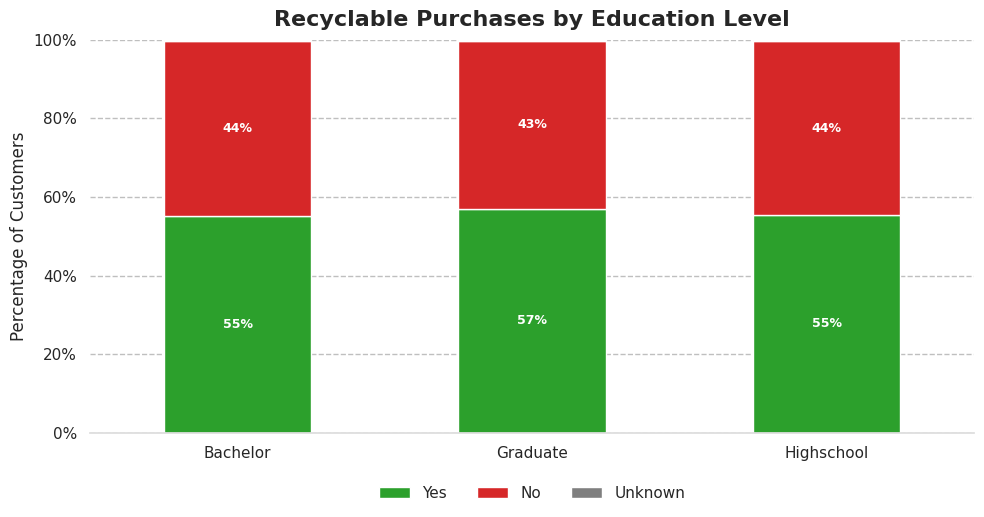

In [ ]:
df_clean = df.dropna(subset=["education", "Is Recyclable?"]).copy()
df_clean["education"] = (
    df_clean["education"]
    .astype(str).str.strip().str.title()
    .replace({"High School": "Highschool"})
)
df_clean["Is Recyclable?"] = (
    df_clean["Is Recyclable?"].astype(str).str.strip().str.lower()
    .map({"yes": "Yes", "no": "No"}).fillna("Unknown")
)

edu_recycle_clean = pd.crosstab(
    df_clean['education'],
    df_clean['Is Recyclable?'],
    normalize='index'
) * 100

order = ["Yes", "No", "Unknown"]
edu_recycle_clean = edu_recycle_clean.reindex(columns=order, fill_value=0)


fig, ax = plt.subplots(figsize=(10, 6))

color_map = {"Yes": "#2ca02c", "No": "#d62728", "Unknown": "#7f7f7f"}
colors = [color_map[col] for col in edu_recycle_clean.columns]

edu_recycle_clean.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax,
    edgecolor='white',
    linewidth=1
)

ax.set_title("Recyclable Purchases by Education Level", fontsize=16, pad=10, fontweight="bold")

ax.set_ylabel("Percentage of Customers", fontsize=12)
ax.set_xlabel(None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0, 100)
plt.xticks(rotation=0, fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.5)

for container in ax.containers:
    for bar in container:
        h = bar.get_height()
        if h >= 4:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + h/2,
                f"{h:.0f}%",
                ha='center', va='center',
                fontsize=9, color="white", fontweight="bold"
            )

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

**While the majority of customers purchase recyclable products, education level is not a significant factor in this behavior.**

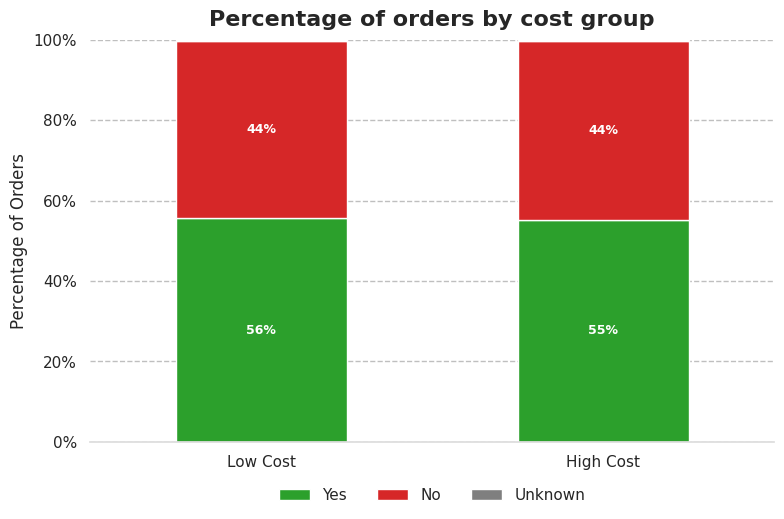

In [ ]:
df_clean = df.dropna(subset=["Is Recyclable?", "cost"]).copy()
df_clean["Is Recyclable?"] = (
    df_clean["Is Recyclable?"].astype(str).str.strip().str.lower()
    .map({"yes": "Yes", "no": "No"}).fillna("Unknown")
)

median_cost = df_clean["cost"].median()
df_clean["Cost Group"] = pd.Series(
    pd.Categorical(
        ["High Cost" if x > median_cost else "Low Cost" for x in df_clean["cost"]],
        categories=["Low Cost", "High Cost"], ordered=True
    ), index=df_clean.index
)

cost_recycle = pd.crosstab(df_clean["Cost Group"], df_clean["Is Recyclable?"], normalize="index") * 100
order = ["Yes", "No", "Unknown"]
cost_recycle = cost_recycle.reindex(columns=order, fill_value=0)

fig, ax = plt.subplots(figsize=(8, 6))

color_map = {"Yes": "#2ca02c", "No": "#d62728", "Unknown": "#7f7f7f"}
colors = [color_map[c] for c in cost_recycle.columns]

cost_recycle.plot(kind="bar", stacked=True, color=colors, ax=ax, edgecolor="white", linewidth=1)

ax.set_title("Percentage of orders by cost group", fontsize=16, pad=10, fontweight="bold")

ax.set_ylabel("Percentage of Orders", fontsize=12)
ax.set_xlabel(None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0, 100)
plt.xticks(rotation=0, fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.5)

for container in ax.containers:
    for bar in container:
        h = bar.get_height()
        if h >= 5:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + h/2, f"{h:.0f}%",
                    ha="center", va="center", fontsize=9, color="white", fontweight="bold")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False, fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

**While the majority of orders are recyclable, order cost is not a significant factor.**

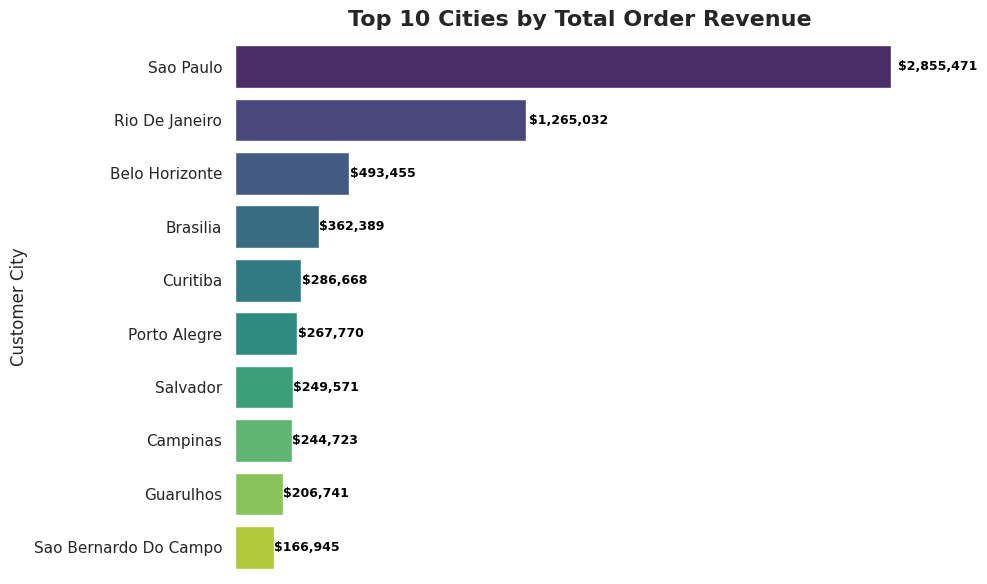

In [ ]:
city_revenue = (
    df.dropna(subset=["customer_city", "cost"])
      .groupby("customer_city")["cost"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=city_revenue.values, y=city_revenue.index.str.title(), palette="viridis", ax=ax)

ax.set_title("Top 10 Cities by Total Order Revenue", fontsize=16, weight="bold", pad=10)

ax.set_xlabel(None)
ax.set_xticks([])
ax.set_ylabel("Customer City", fontsize=12)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

for i, v in enumerate(city_revenue.values):
    ax.text(v * 1.01, i, f"${v:,.0f}",
            va="center",
            ha="left",
            fontsize=9,
            color="black",
            fontweight="bold")

fig.tight_layout()
plt.show()

**São Paulo is the top-earning city by a wide margin, generating more than double the revenue of the second-place city, Rio de Janeiro.**

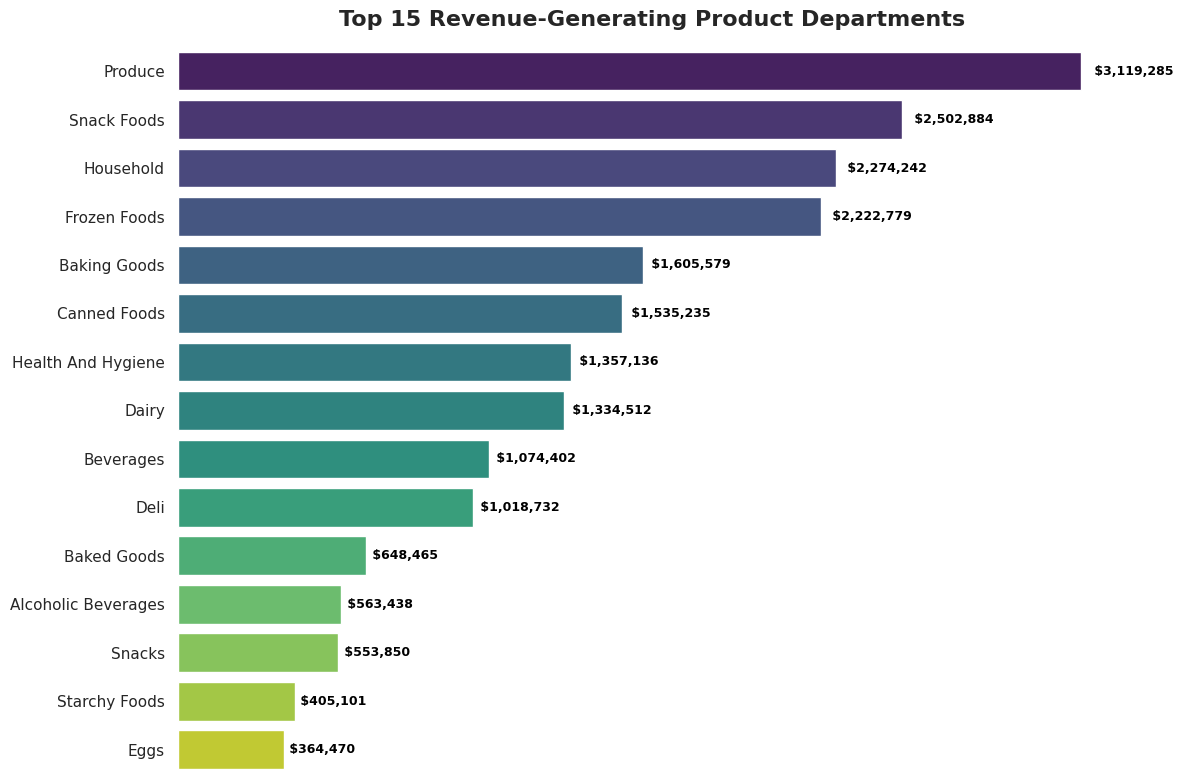

In [ ]:
dept_revenue = (
    df.dropna(subset=["department", "cost"])
      .groupby("department")["cost"]
      .sum()
      .sort_values(ascending=False)
)

top_depts = dept_revenue.head(15)

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=top_depts.values, y=top_depts.index.str.title(), palette="viridis", ax=ax)

ax.set_title("Top 15 Revenue-Generating Product Departments", fontsize=16, weight="bold", pad=15)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

for i, v in enumerate(top_depts.values):
    ax.text(v * 1.01, i, f" ${v:,.0f}",
            va="center",
            ha="left",
            fontsize=9,
            color="black",
            fontweight="bold")

fig.tight_layout()
plt.show()

**Fresh produce stands out as the top revenue source. Categories like snack foods, frozen foods, and canned goods consistently rank high, indicating that consumer spending is heavily geared towards convenience.**

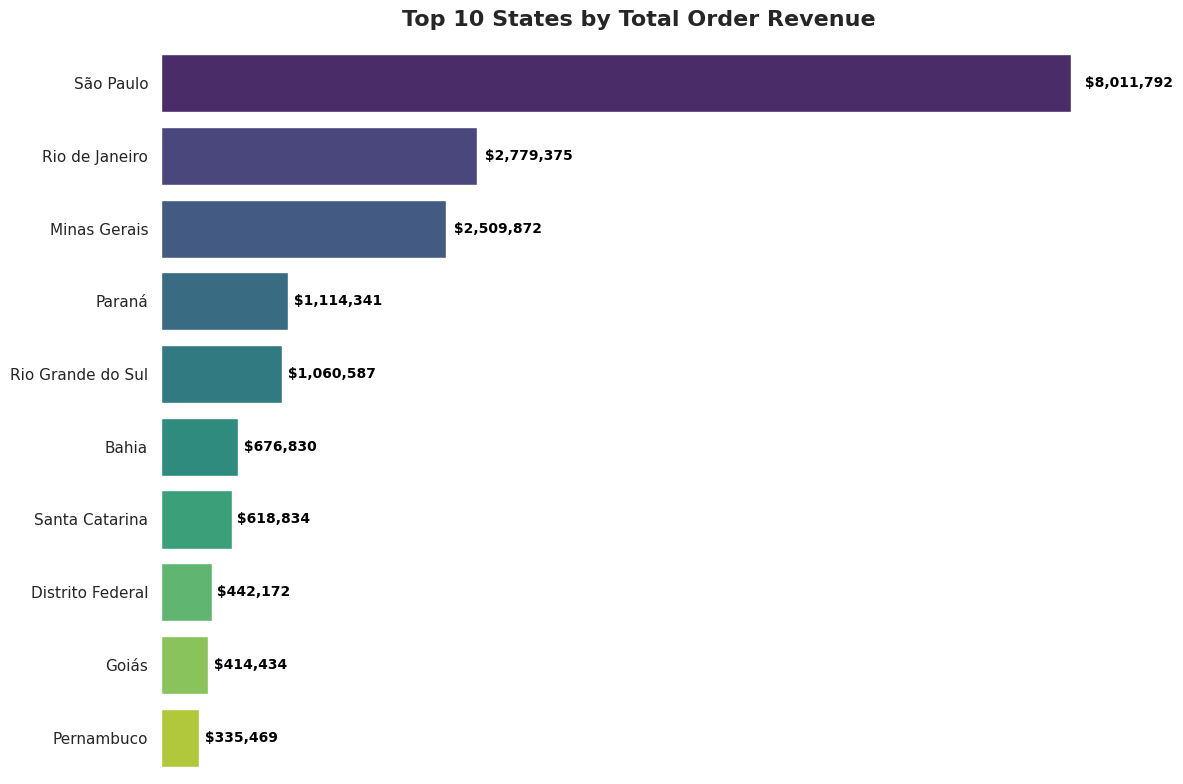

In [ ]:
df_states = df.dropna(subset=["customer_state", "cost"]).copy()
df_states["customer_state"] = df_states["customer_state"].astype(str).str.strip().str.lower()

valid_states = {
    "ac","al","ap","am","ba","ce","df","es","go","ma","mt","ms",
    "mg","pa","pb","pr","pe","pi","rj","rn","rs","ro","rr","sc","sp","se","to"
}

df_states = df_states[df_states["customer_state"].isin(valid_states)]

state_full_map = {
    "ac": "Acre", "al": "Alagoas", "ap": "Amapá", "am": "Amazonas", "ba": "Bahia",
    "ce": "Ceará", "df": "Distrito Federal", "es": "Espírito Santo", "go": "Goiás",
    "ma": "Maranhão", "mt": "Mato Grosso", "ms": "Mato Grosso do Sul",
    "mg": "Minas Gerais", "pa": "Pará", "pb": "Paraíba", "pr": "Paraná",
    "pe": "Pernambuco", "pi": "Piauí", "rj": "Rio de Janeiro", "rn": "Rio Grande do Norte",
    "rs": "Rio Grande do Sul", "ro": "Rondônia", "rr": "Roraima", "sc": "Santa Catarina",
    "sp": "São Paulo", "se": "Sergipe", "to": "Tocantins",
}

state_rev = (
    df_states.groupby("customer_state")["cost"].sum()
    .sort_values(ascending=False)
    .head(10)
)

state_rev.index = state_rev.index.to_series().map(state_full_map)

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=state_rev.values, y=state_rev.index, palette="viridis", ax=ax)

ax.set_title("Top 10 States by Total Order Revenue", fontsize=16, weight="bold", pad=15)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

for i, v in enumerate(state_rev.values):
    ax.text(v * 1.01, i, f" ${v:,.0f}",
            va="center",
            ha="left",
            fontsize=10,
            color="black",
            fontweight="bold")

fig.tight_layout()
plt.show()

**São Paulo alone generates almost 45% of the revenue from the top 10 states. While this concentration demonstrates the state's importance to the business, it also signals potential over-dependence on a single market.**

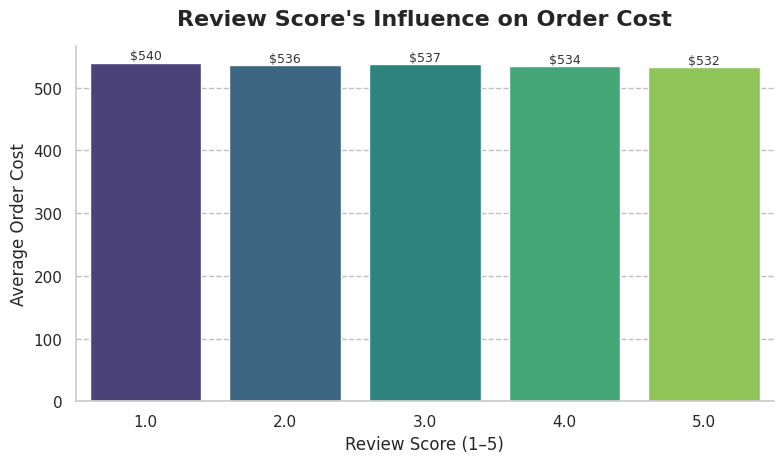

In [ ]:
df_reviews = df.dropna(subset=["review_score", "cost"]).copy()

review_avg_cost = df_reviews.groupby("review_score")["cost"].mean()

fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x=review_avg_cost.index, y=review_avg_cost.values, palette="viridis", ax=ax)

ax.set_title("Review Score's Influence on Order Cost", fontsize=16, weight="bold", pad=15)

ax.set_xlabel("Review Score (1–5)", fontsize=12)
ax.set_ylabel("Average Order Cost", fontsize=12)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.5)

for i, v in enumerate(review_avg_cost.values):
    ax.text(i, v * 1.01, f"${v:,.0f}",
            ha="center", fontsize=9, color="#333333")

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Order cost has no influence on customer satisfaction. The average cost of an order is nearly identical, regardless of whether it receives a 1-star or a 5-star review.**

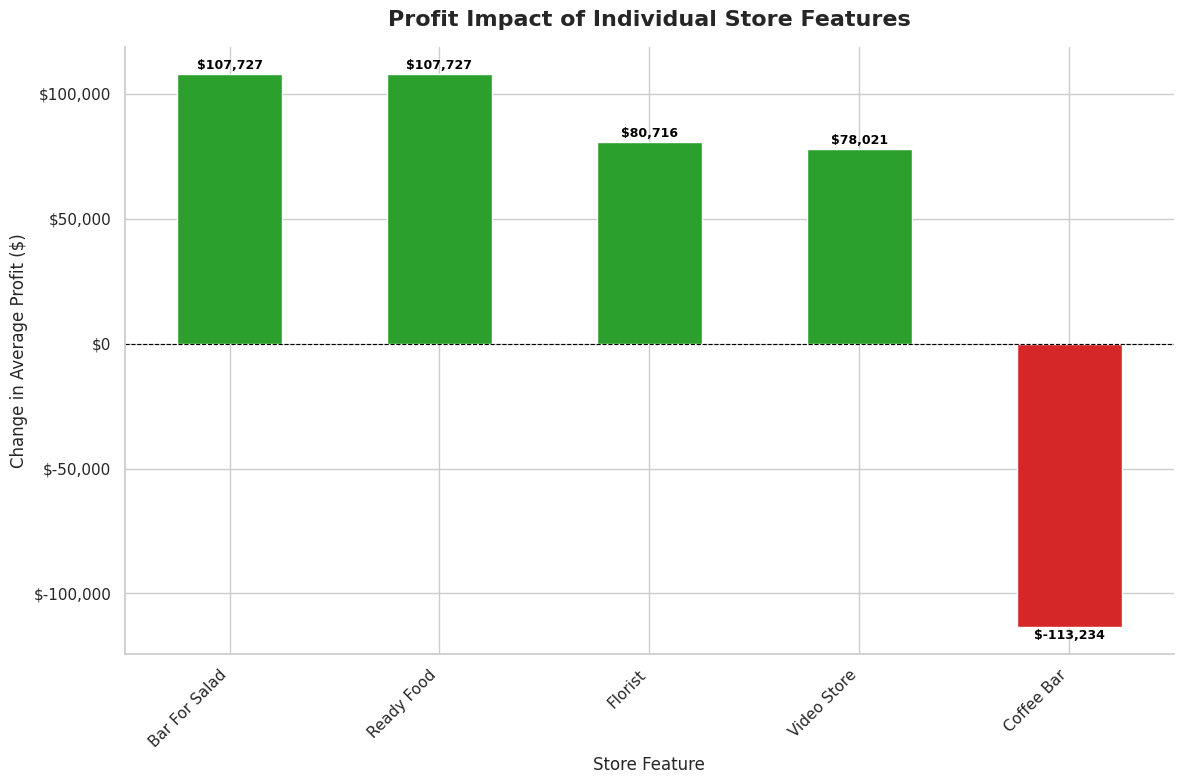

In [ ]:
def parse_features(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else []
    except (ValueError, SyntaxError):
        return []

df["Features"] = df["Additional Features in market"].apply(parse_features)
df["profit"] = df["Store Sales"] - df["Store Cost"]

all_features = list(chain.from_iterable(df["Features"]))
feature_counts = pd.Series(all_features).value_counts()

feature_profit = {}
for feature in feature_counts.index:
    has_feature = df["Features"].apply(lambda f: feature in f)
    if df.loc[~has_feature, "profit"].empty:
        continue
    feature_profit[feature] = {
        "With Feature": df.loc[has_feature, "profit"].mean(),
        "Without Feature": df.loc[~has_feature, "profit"].mean(),
        "Difference": df.loc[has_feature, "profit"].mean() - df.loc[~has_feature, "profit"].mean()
    }

feature_profit_df = pd.DataFrame(feature_profit).T.sort_values("Difference", ascending=False)

feature_profit_df.index = feature_profit_df.index.str.replace('_', ' ').str.title()
colors = ['#2ca02c' if x > 0 else '#d62728' for x in feature_profit_df['Difference']]

fig, ax = plt.subplots(figsize=(12, 8))

feature_profit_df['Difference'].plot(kind='bar', ax=ax, color=colors)

ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

ax.set_title("Profit Impact of Individual Store Features", fontsize=16, weight="bold", pad=15)
ax.set_ylabel("Change in Average Profit ($)", fontsize=12)
ax.set_xlabel("Store Feature", fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

for i, v in enumerate(feature_profit_df['Difference']):
    ax.text(i, v + (feature_profit_df['Difference'].abs().max() * 0.03 * (-1 if v < 0 else 1)),
            f'${v:,.0f}',
            ha='center',
            va='center',
            fontsize=9,
            fontweight='bold',
            color='black')


plt.xticks(rotation=45, ha="right")
fig.tight_layout()
plt.show()

**Salad Bars and Ready Food sections are highly profitable, each adding over $107,000 to average profit. In contrast, the Coffee Bar is a major liability, associated with an average profit decrease of more than \$113,000 per store.**

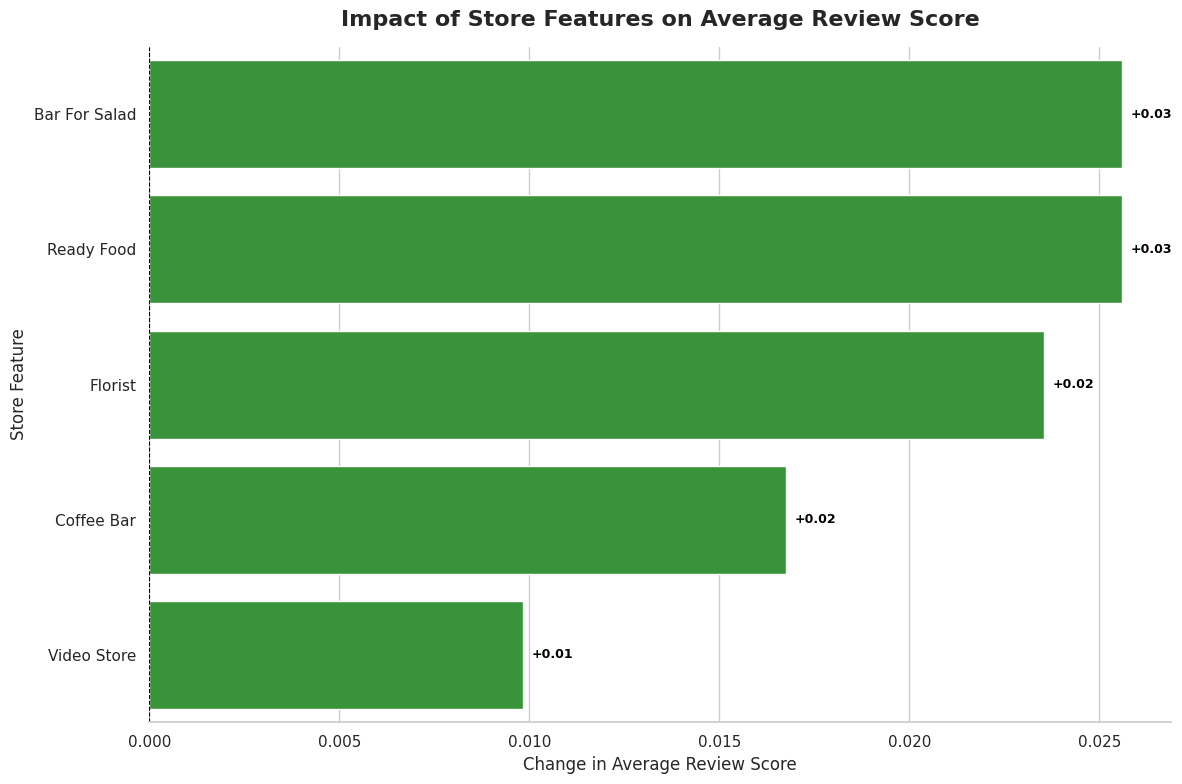

In [ ]:
def parse_features(x):
    if isinstance(x, list):
        return [str(i).strip() for i in x]
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
            if isinstance(v, list):
                return [str(i).strip() for i in v]
        except Exception:
            pass
    return []

df_feat = df.dropna(subset=["Additional Features in market", "review_score"]).copy()
df_feat["features_list"] = df_feat["Additional Features in market"].apply(parse_features)

all_features = sorted({f for L in df_feat["features_list"] for f in L})
rows = []
for f in all_features:
    has = df_feat["features_list"].apply(lambda L: f in L)
    rows.append({
        "feature": f,
        "has_avg": df_feat.loc[has, "review_score"].mean(),
        "not_avg": df_feat.loc[~has, "review_score"].mean(),
        "lift": df_feat.loc[has, "review_score"].mean() - df_feat.loc[~has, "review_score"].mean(),
        "n_has": has.sum(),
        "n_not": (~has).sum()
    })
res = pd.DataFrame(rows).sort_values("lift", ascending=False).reset_index(drop=True)

res["feature"] = res["feature"].str.replace('_', ' ').str.title()

colors = ['#2ca02c' if x > 0 else '#d62728' for x in res['lift']]

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data=res, x='lift', y='feature', palette=colors, ax=ax)

ax.axvline(0, color='black', linewidth=0.8, linestyle='--')

ax.set_title("Impact of Store Features on Average Review Score", fontsize=16, weight="bold", pad=15)
ax.set_xlabel("Change in Average Review Score", fontsize=12)
ax.set_ylabel("Store Feature", fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for i, v in enumerate(res['lift']):
    ax.text(v + (res['lift'].abs().max() * 0.03 * (-1 if v < 0 else 1)),
            i,
            f'{v:+.2f}',
            va='center',
            ha='center',
            fontsize=9,
            fontweight='bold',
            color='black')

fig.tight_layout()
plt.show()

**Although all listed features slightly increase customer ratings, their impact is marginal. Even the best-performing features, like the Salad Bar, only lift the average review score by a practically insignificant +0.03 points.**

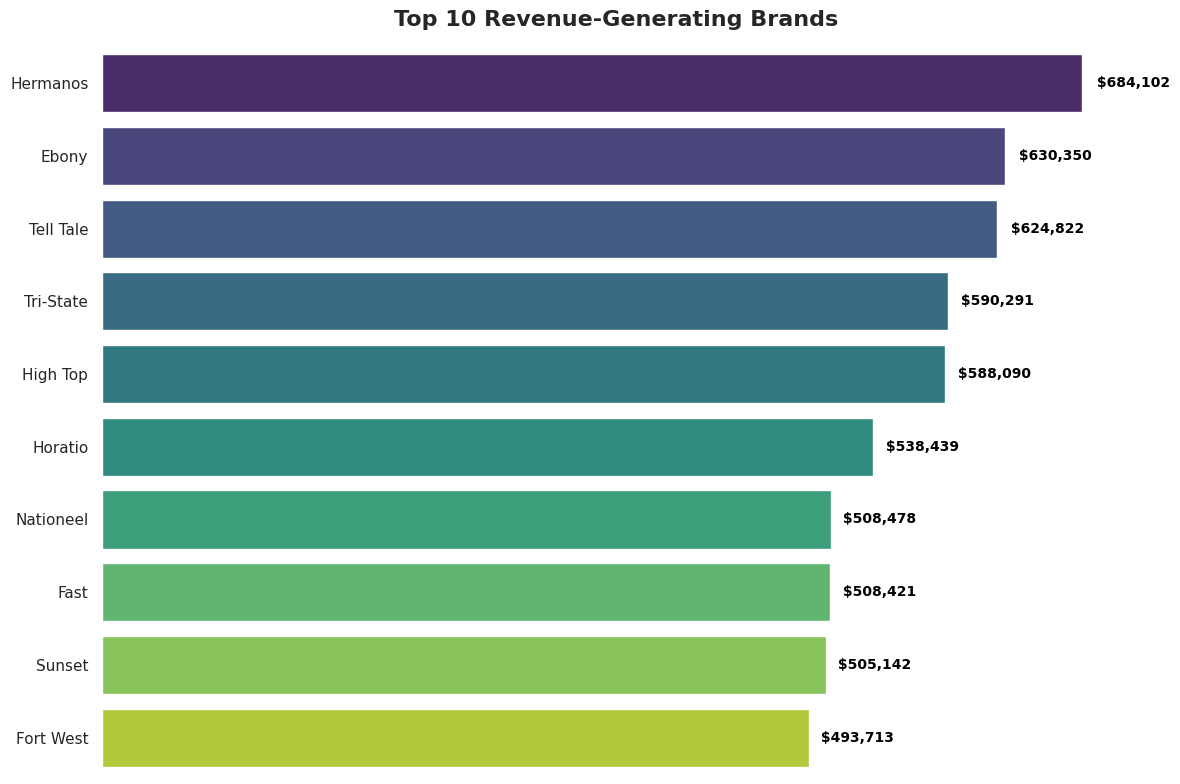

In [ ]:
brand_revenue = (
    df.dropna(subset=["brand", "cost"])
      .groupby("brand")["cost"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=brand_revenue.values, y=brand_revenue.index.str.title(), palette="viridis", ax=ax)

ax.set_title("Top 10 Revenue-Generating Brands", fontsize=16, weight="bold", pad=15)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

for i, v in enumerate(brand_revenue.values):
    ax.text(v *1.01, i, f" ${v:,.0f}",
            va="center",
            ha="left",
            fontsize=10,
            color="black",
            fontweight="bold")

fig.tight_layout()
plt.show()

**The brand landscape is highly competitive with no runaway leader. While Hermanos is the top earner, the revenue among the leading brands is very closely grouped, indicating a fragmented market.**

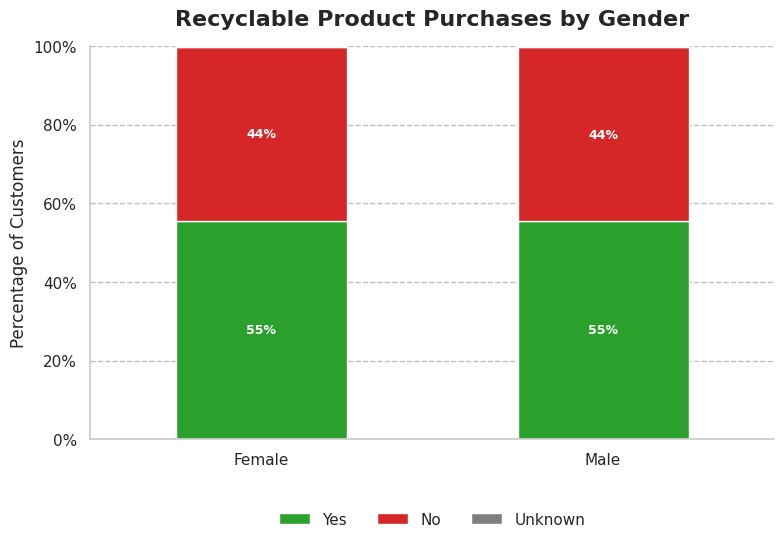

In [ ]:
df_g = df.dropna(subset=["gender", "Is Recyclable?"]).copy()
df_g["gender"] = df_g["gender"].astype(str).str.strip().str.lower().map(
    {"male":"Male", "m":"Male", "female":"Female", "f":"Female"}
).fillna("Other/Unknown")

df_g["Is Recyclable?"] = (
    df_g["Is Recyclable?"].astype(str).str.strip().str.lower()
    .map({"yes":"Yes", "no":"No"}).fillna("Unknown")
)

tab = pd.crosstab(df_g["gender"], df_g["Is Recyclable?"], normalize="index") * 100
tab = tab.reindex(columns=["Yes","No","Unknown"], fill_value=0)

color_map = {"Yes":"#2ca02c","No":"#d62728","Unknown":"#7f7f7f"}
colors = [color_map[c] for c in tab.columns]

fig, ax = plt.subplots(figsize=(8, 6))

tab.plot(kind="bar", stacked=True, color=colors, ax=ax, edgecolor="white", linewidth=1)

ax.set_title("Recyclable Product Purchases by Gender", fontsize=16, weight="bold", pad=15)

ax.set_ylabel("Percentage of Customers", fontsize=12)
ax.set_xlabel("")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0, 100)
plt.xticks(rotation=0, fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.5)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

for container in ax.containers:
    for bar in container:
        h = bar.get_height()
        if h >= 4:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + h / 2, f"{h:.0f}%",
                    ha="center", va="center", fontsize=9, color="white", fontweight="bold")

fig.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

**Gender has no influence on the purchasing of recyclable products.**

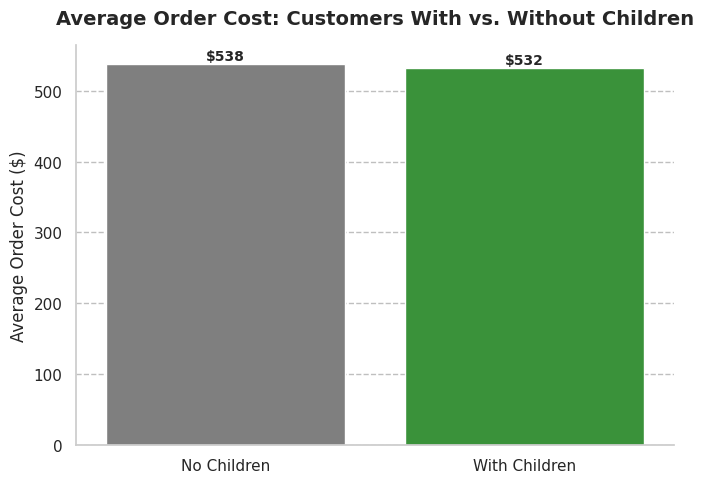

In [ ]:
df_kids = df.dropna(subset=["children_number", "cost"]).copy()
df_kids["Has Children"] = (df_kids["children_number"].astype(float) > 0).map({True:"With Children", False:"No Children"})

avg_cost = (
    df_kids.groupby("Has Children")["cost"]
    .mean()
    .reindex(["No Children", "With Children"])
    .reset_index()
)

fig, ax = plt.subplots(figsize=(7, 5))

palette = {"No Children":"#7f7f7f", "With Children":"#2ca02c"}
sns.barplot(data=avg_cost, x="Has Children", y="cost", palette=palette, ax=ax)

ax.set_title("Average Order Cost: Customers With vs. Without Children", fontsize=14, weight="bold", pad=15)
ax.set_xlabel("")
ax.set_ylabel("Average Order Cost ($)", fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.5)

for i, v in enumerate(avg_cost["cost"]):
    ax.text(i, v + avg_cost["cost"].max()*0.01, f"${v:,.0f}", ha="center", fontsize=10, fontweight='bold')

cost_no_children = avg_cost.loc[0, "cost"]
cost_with_children = avg_cost.loc[1, "cost"]
difference = cost_with_children - cost_no_children
pct_increase = (difference / cost_no_children) * 100

fig.tight_layout()
plt.show()

**The average order cost is nearly identical for both groups. Customers without children spend slightly more on average (\$538) than those with children (\$532), making the difference negligible.**

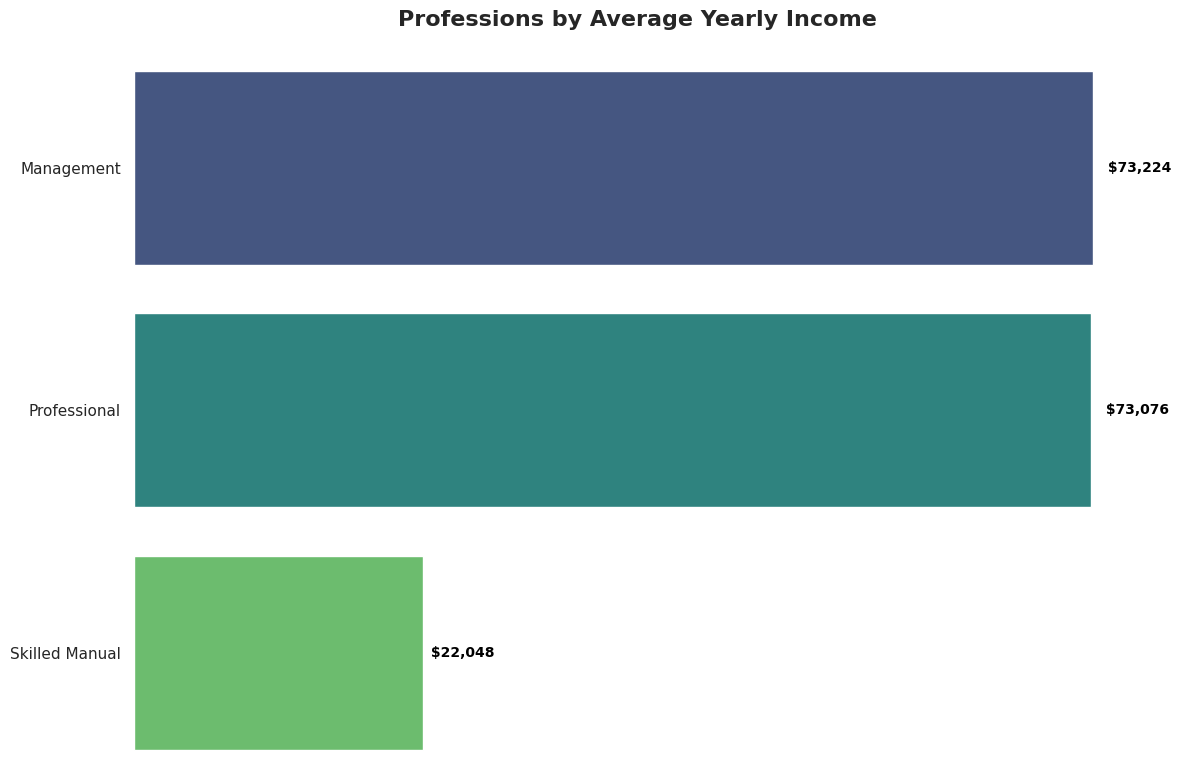

In [ ]:
df_prof = df.dropna(subset=["profession", "Yearly Income"]).copy()

prof_income = (
    df_prof.groupby("profession")["Yearly Income"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=prof_income.values, y=prof_income.index.str.title(), palette="viridis", ax=ax)

ax.set_title("Professions by Average Yearly Income", fontsize=16, weight="bold", pad=15)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

for i, v in enumerate(prof_income.values):
    ax.text(v * 1.01, i, f" ${v:,.0f}",
            va="center",
            ha="left",
            fontsize=10,
            color="black",
            fontweight="bold")

fig.tight_layout()
plt.show()

**Management and Professional roles average about \$73,000 a year, more than three times the \$22,000 average for Skilled Manual labor.**

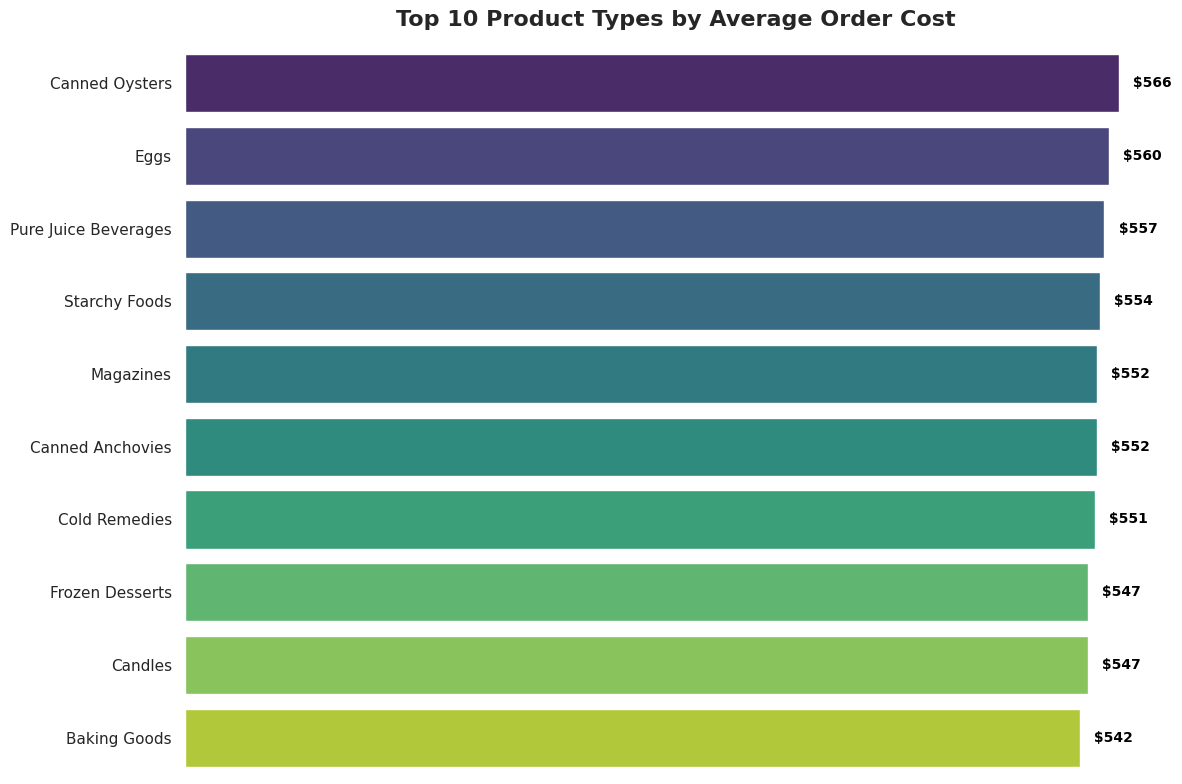

In [ ]:
df_prod = df.dropna(subset=["product_type", "cost"]).copy()
prod_revenue = (
    df_prod.groupby("product_type")["cost"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=prod_revenue.values, y=prod_revenue.index.str.title(), palette="viridis", ax=ax)

ax.set_title("Top 10 Product Types by Average Order Cost", fontsize=16, weight="bold", pad=15)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

for i, v in enumerate(prod_revenue.values):
    ax.text(v * 1.01, i, f" ${v:,.0f}",
            va="center",
            ha="left",
            fontsize=10,
            color="black",
            fontweight="bold")

fig.tight_layout()
plt.show()

**The top product types are all associated with a similarly high average order cost of around $550. This indicates these items don't drive high costs themselves, but are instead frequently included in large shopping baskets.**

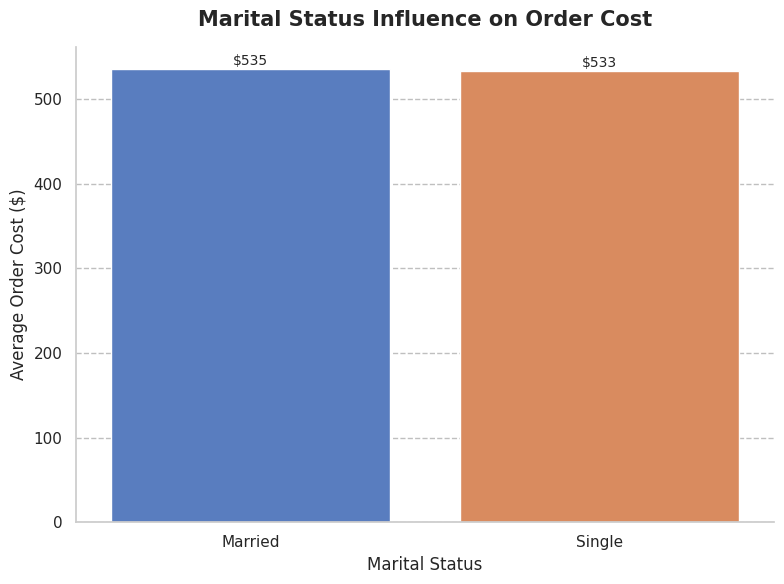

In [ ]:
df_marital = df.dropna(subset=["marital_status", "cost"]).copy()
marital_cost = (
    df_marital.groupby("marital_status")["cost"]
    .mean()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=marital_cost.index.str.title(), y=marital_cost.values, palette="muted", ax=ax)

ax.set_title("Marital Status Influence on Order Cost", fontsize=15, weight="bold", pad=15)

ax.set_xlabel("Marital Status", fontsize=12)
ax.set_ylabel("Average Order Cost ($)", fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.5)

for i, v in enumerate(marital_cost.values):
    ax.text(i, v + marital_cost.max()*0.01, f"${v:,.0f}", ha="center", fontsize=10)

fig.tight_layout()
plt.show()

**Marital status has no significant impact on a customer's average order cost.**

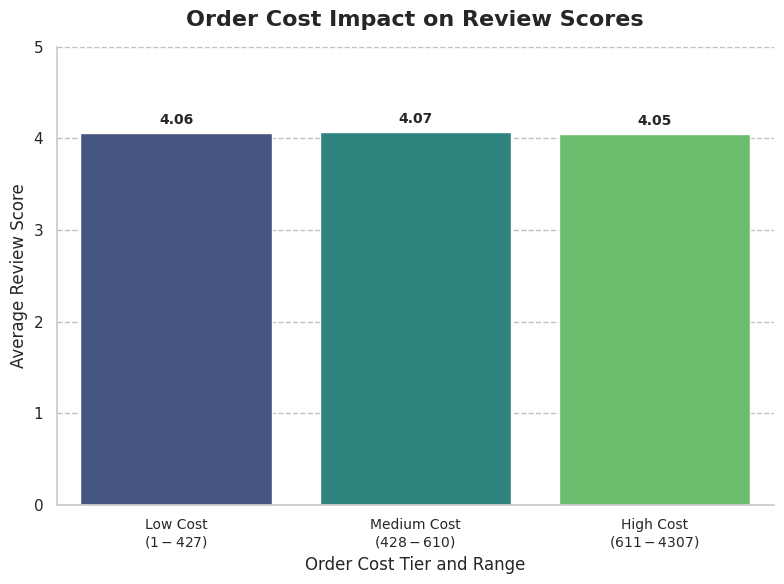

In [ ]:
df_cost_rev = df.dropna(subset=['cost', 'review_score']).copy()

df_cost_rev['Cost Tier'] = pd.qcut(
    df_cost_rev['cost'],
    q=3,
    labels=['Low Cost', 'Medium Cost', 'High Cost']
)

tier_ranges = df_cost_rev.groupby('Cost Tier')['cost'].agg(['min', 'max'])
new_xticklabels = [f"{tier}\n(${int(ranges['min'])} - ${int(ranges['max'])})"
                   for tier, ranges in tier_ranges.iterrows()]

avg_review_by_cost = df_cost_rev.groupby('Cost Tier')['review_score'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    data=avg_review_by_cost,
    x='Cost Tier',
    y='review_score',
    palette='viridis',
    ax=ax
)

ax.set_xticklabels(new_xticklabels, fontsize=10)

ax.set_title("Order Cost Impact on Review Scores", fontsize=16, weight="bold", pad=15)
ax.set_xlabel("Order Cost Tier and Range", fontsize=12)
ax.set_ylabel("Average Review Score", fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.5)
ax.set_ylim(0, 5)

for i, row in avg_review_by_cost.iterrows():
    ax.text(i, row['review_score'] + 0.1, f"{row['review_score']:.2f}",
            ha='center', fontsize=10, fontweight='bold')

fig.tight_layout()
plt.show()

**The cost of an order has no meaningful impact on customer satisfaction.**

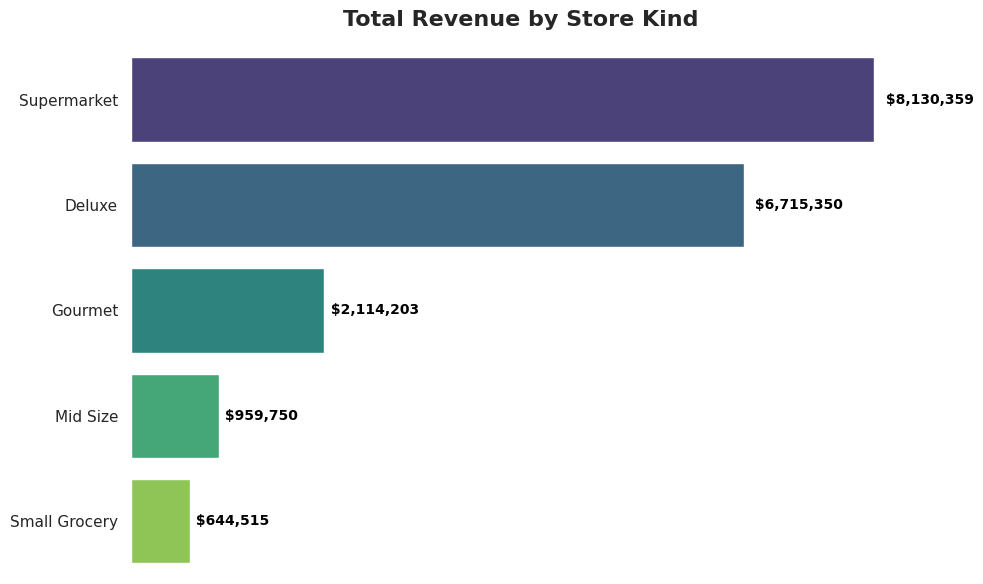

In [ ]:
df_store = df.dropna(subset=["Store Kind", "cost"]).copy()
store_revenue = (
    df_store.groupby("Store Kind")["cost"]
    .sum()
    .sort_values(ascending=False)
)
store_revenue = store_revenue[store_revenue.index != 'unknown']

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=store_revenue.values, y=store_revenue.index.str.title(), palette="viridis", ax=ax)

ax.set_title("Total Revenue by Store Kind", fontsize=16, weight="bold", pad=15)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

for i, v in enumerate(store_revenue.values):
    ax.text(v *1.01, i, f" ${v:,.0f}",
            va="center",
            ha="left",
            fontsize=10,
            color="black",
            fontweight="bold")

fig.tight_layout()
plt.show()

**Revenue is overwhelmingly driven by the two largest formats: Supermarkets (at \$8.1 million) and Deluxe stores (at \$6.7 million). Smaller store types contribute only a fraction of this amount, showing that success is tied to large-scale locations.**

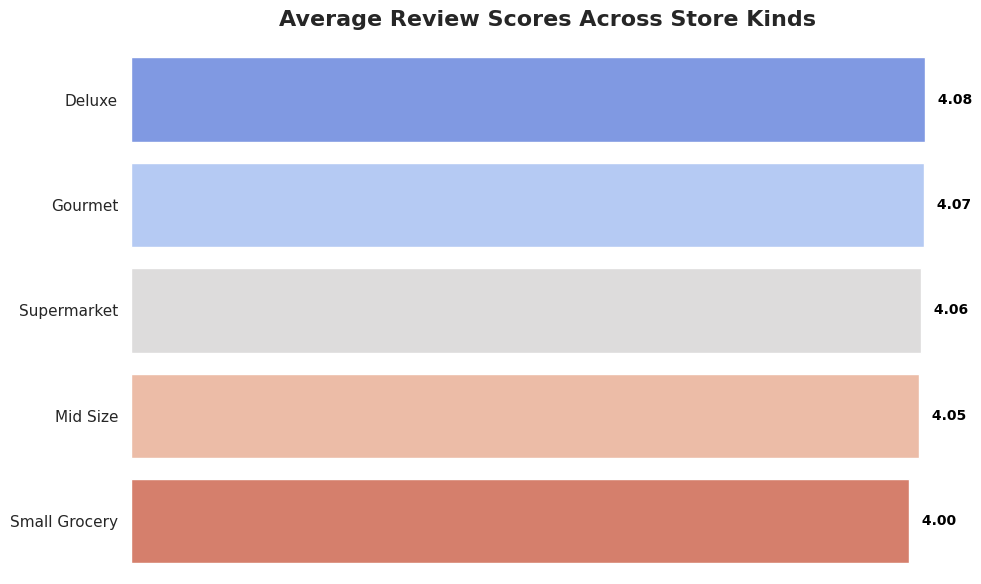

In [ ]:
df_store_review = df.dropna(subset=["Store Kind", "review_score"]).copy()
store_reviews = (
    df_store_review.groupby("Store Kind")["review_score"]
    .mean()
    .sort_values(ascending=False)
)
store_reviews = store_reviews[store_reviews.index != 'unknown']

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=store_reviews.values, y=store_reviews.index.str.title(), palette="coolwarm", ax=ax)

ax.set_title("Average Review Scores Across Store Kinds", fontsize=16, weight="bold", pad=15)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

for i, v in enumerate(store_reviews.values):
    ax.text(v *1.01, i, f" {v:.2f}",
            va="center",
            ha="left",
            fontsize=10,
            color="black",
            fontweight="bold")

fig.tight_layout()
plt.show()

**All store kinds have a very similar average review score, indicating that store type is not a major factor in customer satisfaction.**

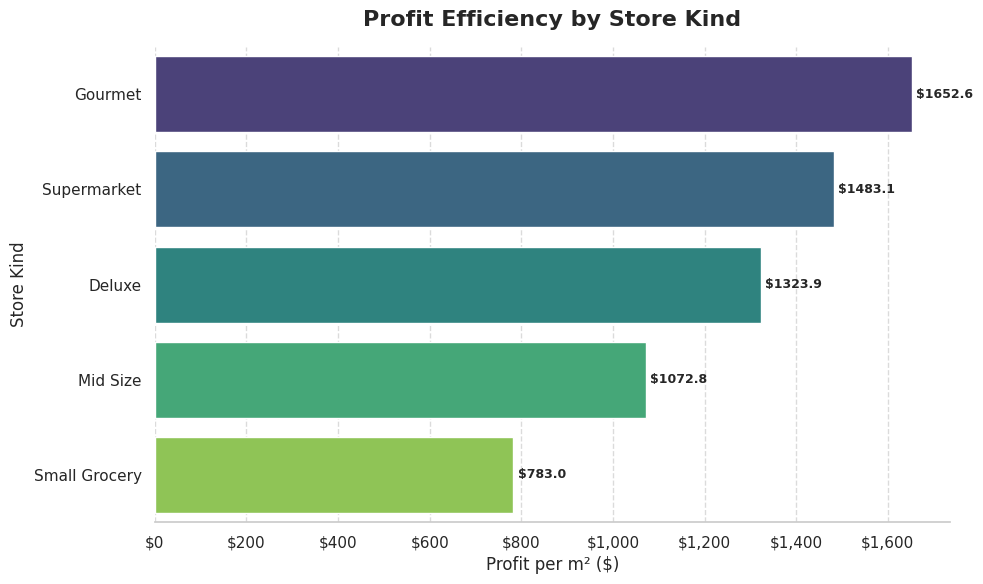

In [ ]:
efficiency_df = (
    df.dropna(subset=["Store Kind", "Store Sales", "Store Cost", "Store Area"])
      .query("`Store Area` > 0")
      .groupby("Store Kind")
      .agg(
          sales_sum=('Store Sales', 'sum'),
          cost_sum=('Store Cost', 'sum'),
          area_sum=('Store Area', 'sum')
      )
      .assign(
          **{"Revenue per m²": lambda x: x['sales_sum'] / x['area_sum']},
          **{"Profit per m²": lambda x: (x['sales_sum'] - x['cost_sum']) / x['area_sum']}
      )
      .sort_values("Profit per m²", ascending=False)
)
efficiency_df = efficiency_df[efficiency_df.index != 'unknown']

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=efficiency_df["Profit per m²"], y=efficiency_df.index.str.title(), palette="viridis", ax=ax)

ax.set_title("Profit Efficiency by Store Kind", fontsize=16, weight="bold", pad=15)
ax.set_xlabel("Profit per m² ($)", fontsize=12)
ax.set_ylabel("Store Kind", fontsize=12)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.7)

for c in ax.containers:
  ax.bar_label(c, fmt="$%.1f", padding=3, fontsize=9, fontweight='bold')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

fig.tight_layout()
plt.show()

**Gourmet stores are the most profit-efficient at $1,652 per m², outperforming even large Supermarkets. This suggests their high-margin, specialized product model is the best at converting physical space into profit.**

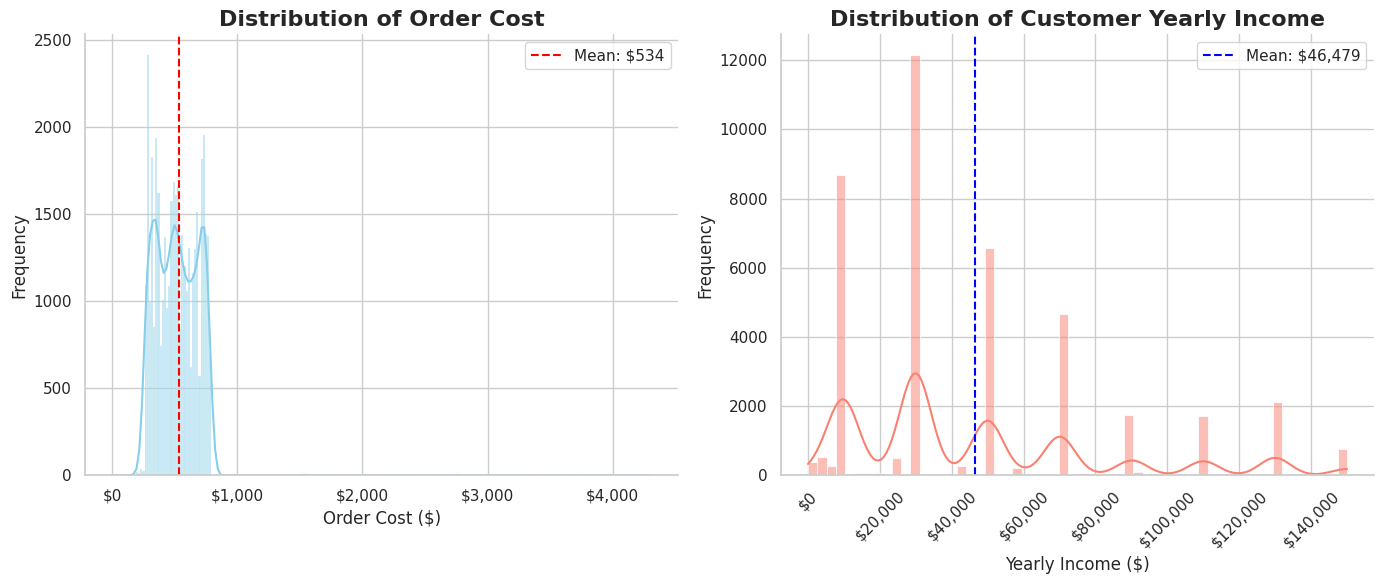

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

cost_data = df['cost'].dropna()
sns.histplot(cost_data, kde=True, ax=ax1, color='skyblue')
mean_cost = cost_data.mean()
ax1.axvline(mean_cost, color='red', linestyle='--', label=f'Mean: ${mean_cost:,.0f}')
ax1.set_title('Distribution of Order Cost', fontsize=16, weight='bold')
ax1.set_xlabel('Order Cost ($)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

income_data = df['Yearly Income'].dropna()
sns.histplot(income_data, kde=True, ax=ax2, color='salmon')
mean_income = income_data.mean()
ax2.axvline(mean_income, color='blue', linestyle='--', label=f'Mean: ${mean_income:,.0f}')
ax2.set_title('Distribution of Customer Yearly Income', fontsize=16, weight='bold')
ax2.set_xlabel('Yearly Income ($)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='x', rotation=45)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

fig.tight_layout()
plt.show()

**Order Cost (Left): The vast majority of transactions are for small amounts, though a few large purchases pull the average order cost up to $534.**

**Yearly Income (Right): The customer base consists mainly of individuals in lower-income brackets, with an average income of $46,479.**

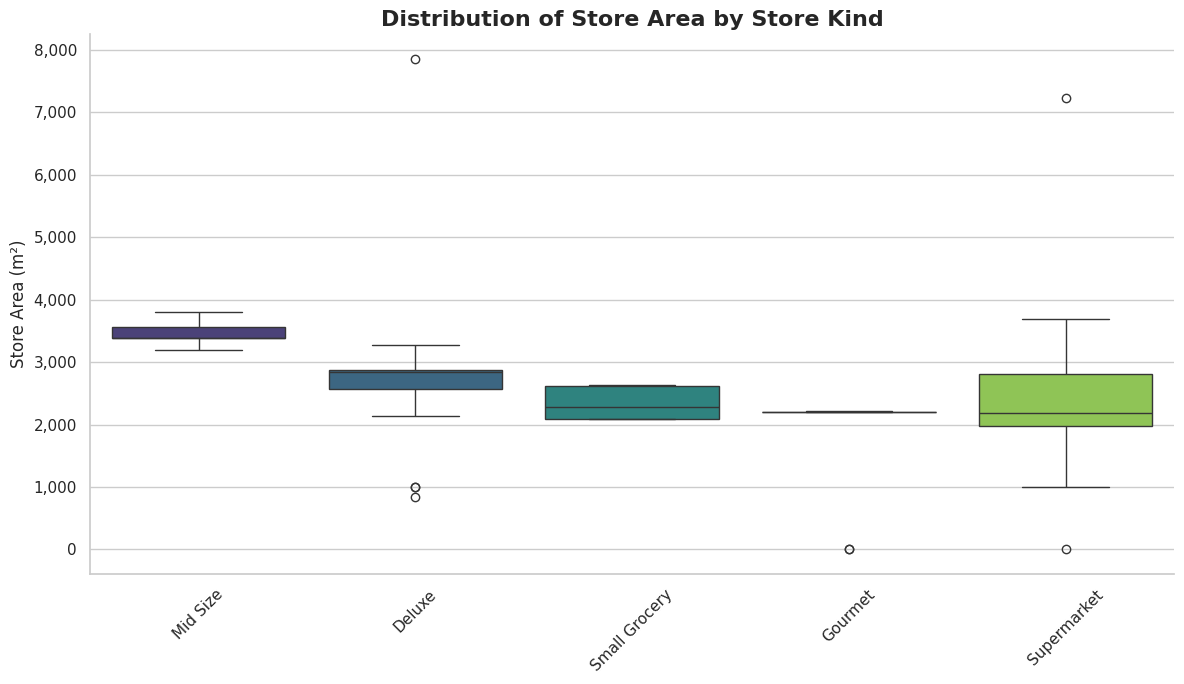

In [ ]:

df_area = df.dropna(subset=['Store Kind', 'Store Area']).copy()
df_area.drop(df_area[df_area['Store Kind'] == 'unknown'].index, inplace=True)
df_area = df_area[df_area['Store Area'] > 0]
df_area['Store Kind'] = df_area['Store Kind'].str.title()

order = df_area.groupby('Store Kind')['Store Area'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=df_area, x='Store Kind', y='Store Area', order=order, palette='viridis', ax=ax)

ax.set_title('Distribution of Store Area by Store Kind', fontsize=16, weight='bold')
ax.set_xlabel(None)
ax.set_ylabel('Store Area (m²)', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

**This chart shows that store size consistency varies greatly by type. Gourmet stores are uniformly small, while Supermarkets have the widest range of sizes.**

**Counter-intuitively, the "Mid Size" category has the highest median area, which suggests an inconsistency in how the stores are classified.**

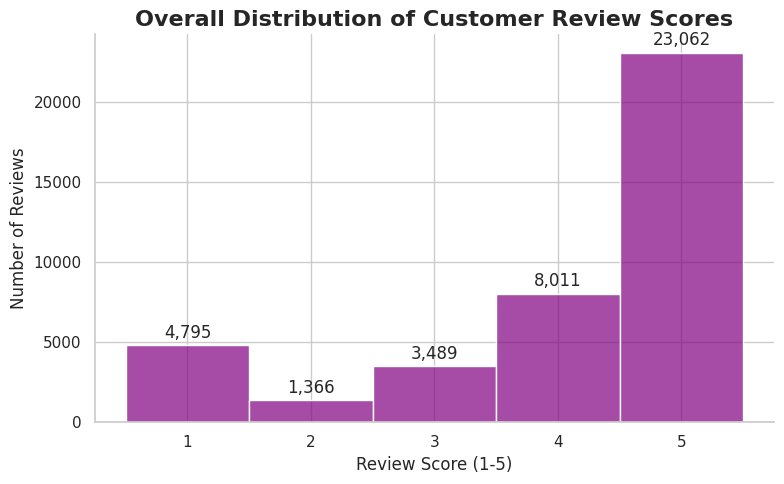

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df.dropna(subset=['review_score']), x='review_score', discrete=True, ax=ax, color='purple', alpha=0.7)

ax.set_title('Overall Distribution of Customer Review Scores', fontsize=16, weight='bold')
ax.set_xlabel('Review Score (1-5)', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

fig.tight_layout()
plt.show()

**The review distribution is heavily left-skewed, as most customers are satisfied, giving 5-star and 4-star ratings. While there is a notable group of dissatisfied 1-star reviewers, they are a much smaller segment.**

# 4.Feature Engineering

In [ ]:
train_df.columns

Index(['Yearly Income', 'Gross Weight', 'Net Weight', 'Is Recyclable?',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Grocery Area', 'Frozen Area', 'Meat Area',
       'cost', 'customer_city', 'customer_state', 'customer_lat',
       'customer_lng', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'review_score', 'Store Area', 'Package Weight',
       'marital_status', 'gender', 'children_number', 'education',
       'profession', 'product_type', 'department', 'brand'],
      dtype='object')

In [ ]:
train_df.isna().sum() / len(train_df)  *100

,0
Yearly Income,0.306130
Gross Weight,23.426225
Net Weight,21.096237
Is Recyclable?,0.000000
Additional Features in market,0.000000
Promotion Name,15.228747
Store Kind,0.000000
Store Sales,0.264827
Store Cost,0.252679
Grocery Area,4.375714


In [ ]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        df['Store Profit'] = df['Store Sales'] - df['Store Cost']

        df['Grocery Ratio'] = df['Grocery Area'] / df['Store Area']
        df['Frozen Ratio']  = df['Frozen Area'] / df['Store Area']
        df['Meat Ratio']    = df['Meat Area']   / df['Store Area']

        df['Profit Margin'] = df['Store Profit'] / (df['Store Sales'])

        df['Weight Density'] = df['Package Weight'] / (df['Store Area'])

        df['Income_per_child'] = df['Yearly Income'] / (df['children_number'] + 1)

        df["Income_x_StoreSales"] = df["Yearly Income"] * df["Store Sales"]
        df["Weight_x_Area"] = df["Net Weight"] * df["Store Area"]

        def haversine(lat1, lon1, lat2, lon2):
            R = 6371
            lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
            dlat = lat2 - lat1
            dlon = lon2 - lon1
            a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
            c = 2 * np.arcsin(np.sqrt(a))
            return R * c

        df["Customer_Seller_Distance"] = haversine(
            df["customer_lat"], df["customer_lng"],
            df["seller_lat"], df["seller_lng"]
        )
        df = df.replace([np.inf, -np.inf], np.nan)

        return df

In [ ]:
train_df = train_df.dropna(subset=['cost'])

# 5.Pipeline

In [ ]:
def apply_if_column_exists(df, col, func):
    if col in df.columns:
        df[col] = df[col].apply(func)
    return df

In [ ]:
def apply_if_columns_exist(df, cols, func):
    if set(cols).issubset(df.columns):
        df[cols] = df[cols].applymap(func)
    return df

In [ ]:
def add_extracted_info(df):
    if "Person Description" in df.columns:
        new_info = df["Person Description"].apply(extract_description_info)
        df = pd.concat([df, new_info], axis=1)
    return df

In [ ]:
def clean_weights(df):
    if set(["Gross Weight","Net Weight","Package Weight"]).issubset(df.columns):
        cleaned = df.apply(clean_and_fill_weights, axis=1)
        for col in ["Gross Weight","Net Weight","Package Weight"]:
            df[col] = cleaned[col]
    return df

In [ ]:
def fill_area(df):
    if set(["Store Area", "Grocery Area", "Frozen Area", "Meat Area"]).issubset(df.columns):
        df = df.assign(**df.apply(fill_store_area, axis=1))
    return df

In [ ]:
def clean_multiple_locations(df):
    location_cols = ["customer_city", "customer_state", "seller_city", "seller_state"]
    for col in location_cols:
        df = apply_if_column_exists(df, col, clean_location)
    return df

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

full_pipeline = Pipeline([

     ("standardize_columns", FunctionTransformer(lambda df: standardize_columns(df, column_mapping), validate=False)),

     ("extract_description_info", FunctionTransformer(add_extracted_info, validate=False)),

     ("clean_yearly_income", FunctionTransformer(lambda df: apply_if_column_exists(df, "Yearly Income", clean_yearly_income), validate=False)),

     ("clean_customer_order", FunctionTransformer(lambda df: pd.concat([df, df["Customer Order"].apply(clean_customer_order)], axis=1) if "Customer Order" in df.columns else df, validate=False)),

     ("clean_and_fill_weights", FunctionTransformer(clean_weights, validate=False)),

     ("clean_recyclability", FunctionTransformer(lambda df: apply_if_column_exists(df, "Is Recyclable?", clean_recyclability), validate=False)),

     ("clean_additional_features", FunctionTransformer(lambda df: apply_if_column_exists(df, "Additional Features in market", clean_additional_features), validate=False)),

     ("clean_promotion_name", FunctionTransformer(lambda df: apply_if_column_exists(df, "Promotion Name", clean_promotion_name), validate=False)),

     ("clean_store_kind", FunctionTransformer(lambda df: apply_if_column_exists(df, "Store Kind", clean_store_kind), validate=False)),

     ("clean_store_sales_and_cost", FunctionTransformer(lambda df: df.assign(**{
        "Store Sales": df["Store Sales"].apply(clean_store_sales_and_cost) if "Store Sales" in df.columns else df.get("Store Sales"),
        "Store Cost": df["Store Cost"].apply(clean_store_sales_and_cost) if "Store Cost" in df.columns else df.get("Store Cost")
    }), validate=False)),

     ("clean_area", FunctionTransformer(lambda df: apply_if_columns_exist(df, ["Store Area","Grocery Area","Frozen Area","Meat Area"], clean_area), validate=False)),

     ("fill_store_area", FunctionTransformer(fill_area, validate=False)),

     ("clean_cost", FunctionTransformer(lambda df: apply_if_column_exists(df, "cost", clean_cost), validate=False)),

     ("clean_location", FunctionTransformer(clean_multiple_locations, validate=False)),

     ("clean_review_score", FunctionTransformer(lambda df: apply_if_column_exists(df, "review_score", clean_review_score), validate=False)),

     ("feature_engineering", FunctionTransformer(FeatureEngineering, validate=False)),
])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.01, upper_quantile=0.99):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
        self.lower_bounds = None
        self.upper_bounds = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.lower_bounds = X.quantile(self.lower_quantile)
        self.upper_bounds = X.quantile(self.upper_quantile)
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=self.lower_bounds.index)
        X = X.clip(self.lower_bounds, self.upper_bounds, axis=1)
        return X

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

class MultiLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Initialize a MultiLabelBinarizer to convert multi-label values into one-hot encoded columns
        self.mlb = MultiLabelBinarizer()
        self.columns_ = None  # Will store the column names after fitting

    def fit(self, X, y=None):
        # Flatten the data if it's in a 2D structure (e.g. a pandas Series or DataFrame column)
        X_flat = X.ravel() if hasattr(X, 'ravel') else X

        # Prepare the data:
        # - If the value is already a list, keep it as is
        # - If the value is NaN or "missing", turn it into an empty list
        # - Otherwise, convert the value into a list with a single string element
        data = [
            v if isinstance(v, list) else ([] if pd.isna(v) or str(v).lower() == "missing" else [str(v)])
            for v in X_flat
        ]

        # Fit the MultiLabelBinarizer on the prepared data
        self.mlb.fit(data)

        # Save the class labels as column names for later use
        self.columns_ = [str(col) for col in self.mlb.classes_]
        return self

    def transform(self, X):
        # Flatten the data again, same as in fit
        X_flat = X.ravel() if hasattr(X, 'ravel') else X

        # Prepare the data the same way as in fit to ensure consistency
        data = [
            v if isinstance(v, list) else ([] if pd.isna(v) or str(v).lower() == "missing" else [str(v)])
            for v in X_flat
        ]

        # Transform the data into a binary matrix (0/1) using the fitted binarizer
        transformed_data = self.mlb.transform(data)

        # Return the transformed data as a pandas DataFrame with the correct column names
        return pd.DataFrame(transformed_data, columns=self.columns_)


In [ ]:
def multi_label_encoder(df):
    # Make a copy of the input DataFrame to avoid changing the original one
    df = df.copy()

    # Loop through all columns listed in multi_label_cols
    for col in multi_label_cols:
        # Check if the column exists in the DataFrame
        if col in df.columns:
            # For each value in the column:
            # - If it's a list, join its elements into a single string separated by commas
            # - Otherwise, just convert the value to a string
            df[col] = df[col].apply(
                lambda x: ",".join(x) if isinstance(x, list) else str(x)
            )

    # Return the transformed DataFrame
    return df

In [ ]:
def skewness_transformer(X):
    X = pd.DataFrame(X, columns=X.columns if hasattr(X, "columns") else None)
    for col in X.columns:
        if (X[col] > 0).all():
            X[col] = np.log1p(X[col])
        else:
            pt = PowerTransformer(method="yeo-johnson")
            X[col] = pt.fit_transform(X[[col]])
    return X

In [ ]:
binary_mapping = {
    "Is Recyclable?": {"yes": 1, "no": 0, "unknown": -1},
    "marital_status": {"single": 0, "married": 1},
    "gender": {"male": 0, "female": 1},
}
binary_cols = ["Is Recyclable?", "marital_status", "gender"]
class CustomBinaryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping, columns):
        self.mapping = mapping
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X, columns=self.columns)
        for col, mapping_dict in self.mapping.items():
            if col in X_df.columns:
                X_df[col] = X_df[col].map(mapping_dict)
        return X_df

In [ ]:
num_cols = [
    'Yearly Income','Gross Weight','Net Weight','Store Sales','Store Cost',
    'Grocery Area','Frozen Area','Meat Area','cost','review_score',
    'Store Area','Package Weight','children_number','Store Profit',
    'Grocery Ratio','Frozen Ratio','Meat Ratio','Profit Margin',
    'Weight Density','Income_per_child'
]

binary_cols = ["Is Recyclable?", "marital_status", "gender"]
low_card_cat_cols = ["education","profession","Store Kind","Promotion Name"]
multi_label_cols = ["Additional Features in market"]
high_card_cat_cols = ["customer_city","seller_city","customer_state","seller_state"]

In [ ]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("outlier_cap", OutlierCapper()),
    ("skew", FunctionTransformer(skewness_transformer, validate=False)),
    ("scaler", RobustScaler())
])

binary_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("custom_binary_encoder", CustomBinaryEncoder(
        mapping=binary_mapping,
        columns=binary_cols
    ))
])

low_card_cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

multi_label_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("mlb", MultiLabelEncoder())
])

In [ ]:
def frequency_encoder(X):
    X = pd.DataFrame(X).copy()
    for col in X.columns:
        freqs = X[col].value_counts(normalize=True)
        X[col] = X[col].map(freqs)
    return X

In [ ]:
import category_encoders as ce

high_card_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("target_encode", ce.TargetEncoder(handle_unknown="value", smoothing=10))
])

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multi_label_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=[])),
    ("mlb", FunctionTransformer(
        lambda x: MultiLabelBinarizer().fit_transform(
            [v if isinstance(v, list) else [str(v)] for v in x.ravel()]
        ),
        validate=False
    ))
])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
X = train_df.drop(['cost'], axis=1)
y = train_df['cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
full_preprocessor = ColumnTransformer([
    ("num", num_pipeline, [c for c in num_cols if c in X_train.columns and c != 'cost']),
    ("binary", binary_pipeline, binary_cols),
    ("low_cat", low_card_cat_pipeline, [c for c in low_card_cat_cols if c in X_train.columns]),
    ("multi", multi_label_pipeline, [c for c in multi_label_cols if c in X_train.columns]),
    ("high_card", high_card_pipeline, [c for c in high_card_cat_cols if c in X_train.columns]),
], remainder="drop")

full_preprocessor_safe = Pipeline([
    ("pre", full_preprocessor),
    ("imputer_final", SimpleImputer(strategy="median"))
])

# 6. Modeling

#### Note : I tried many models but this is the best 'RMSE' value with me

In [ ]:
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

preprocessor = full_preprocessor
lgbm_model = LGBMRegressor(
    objective='regression_l1',
    n_estimators=2000,
    learning_rate=0.01,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    reg_alpha=0.1,
    reg_lambda=0.1
)
y_train_log = np.log1p(y_train)
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train, y_train_log, test_size=0.15, random_state=42
)

preprocessor.fit(X_train_part, y_train_part)

X_train_part_transformed = preprocessor.transform(X_train_part)
X_val_transformed = preprocessor.transform(X_val)

lgbm_model.fit(X_train_part_transformed, y_train_part,
               eval_set=[(X_val_transformed, y_val)],
               callbacks=[lgbm.early_stopping(100, verbose=False)])

X_test_transformed = preprocessor.transform(X_test)
y_pred_log = lgbm_model.predict(X_test_transformed)
y_pred = np.expm1(y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Final LightGBM Pipeline RMSE: {rmse:.4f}")

'''
Final LightGBM Pipeline RMSE: 221.9658
'''

In [ ]:
# Apply the preprocessor to the training and test data
X_train_transformed = full_preprocessor_safe.transform(X_train)
X_test_transformed = full_preprocessor_safe.transform(X_test)

In [ ]:
import optuna
from sklearn.model_selection import KFold

# We use the full training set for this
# It is important to fit transform the data here so that the number of features
# for LightGBM is consistent across all folds.
X_train_transformed = full_preprocessor_safe.fit_transform(X_train, y_train)
y_train_log = np.log1p(y_train)

def objective(trial):
    """This is the function Optuna will try to minimize."""

    # 1. Suggest a set of hyperparameters for this trial
    params = {
        'objective': 'regression_l1',
        'n_estimators': 2000, # We use early stopping, so this is just a max limit
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', -1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'random_state': 42,
        'n_jobs': -1,
    }

    # 2. Create the model with these parameters
    model = LGBMRegressor(**params)

    # 3. Perform cross-validation manually to include early stopping
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, val_index in kf.split(X_train_transformed, y_train_log):
        X_train_fold, X_val_fold = X_train_transformed[train_index], X_train_transformed[val_index]
        y_train_fold, y_val_fold = y_train_log.iloc[train_index], y_train_log.iloc[val_index]

        model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  callbacks=[lgbm.early_stopping(100, verbose=False)])

        y_pred_fold = model.predict(X_val_fold)
        rmse_fold = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(y_pred_fold))) # Inverse transform for RMSE

        rmse_scores.append(rmse_fold)

    # Use the mean RMSE across folds as the score for Optuna (minimize RMSE)
    mean_rmse = np.mean(rmse_scores)

    # Optuna minimizes the objective function, so return the negative RMSE
    return -mean_rmse

# 4. Create an Optuna study and run the optimization
# We are maximizing the negative RMSE, which is equivalent to minimizing RMSE
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Run 50 trials to search for parameters

# 5. Print the best parameters found
print("Best trial:")
trial = study.best_trial
print(f"  Value: {-trial.value:.4f}") # Print the positive RMSE
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Save the best parameters to use in your final model
best_params = trial.params

'''
Best trial:
  Value: 210.4899
  Params:
    learning_rate: 0.04788409344216523
    num_leaves: 85
    max_depth: 0
    min_child_samples: 14
    subsample: 0.6222575082388734
    colsample_bytree: 0.8113200227286547
    reg_alpha: 0.038795799716315804
    reg_lambda: 0.15288821692400575
'''

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
test_df_raw = pd.read_csv('/content/test.csv')
test_ids = test_df_raw['ID'].copy()

# Apply the full_pipeline to the raw test data to generate the necessary columns

cleaned_test_df = full_pipeline.transform(test_df_raw)

# Now apply the full_preprocessor_safe to the cleaned test data
# Ensure the preprocessor is fitted on the training data before transforming the test data

full_preprocessor_safe.fit(X_train, y_train)
cleaned_test_df_transformed = full_preprocessor_safe.transform(cleaned_test_df)

# Train the final LightGBM model using the best parameters found by Optuna
final_lgbm_model = LGBMRegressor(**best_params)

# Train on the entire training data (log-transformed target)
final_lgbm_model.fit(X_train_transformed, y_train_log)

# Make predictions on the transformed test data
predictions_log = final_lgbm_model.predict(cleaned_test_df_transformed)

# Inverse transform the predictions
final_predictions = np.expm1(predictions_log)

# Ensure predictions are non-negative if cost cannot be negative
final_predictions[final_predictions < 0] = 0

submission_df = pd.DataFrame({
    'id': test_ids,
    'cost': final_predictions
})

submission_df.to_csv('submission.csv', index=False)

print(submission_df.head())
'''
   id        cost
0   0  727.989717
1   1  644.315005
2   2  731.839093
3   3  436.090846
4   4  755.312412

'''

Loading test data...
Applying the initial cleaning and feature engineering pipeline to test data...
Applying the final preprocessor to the cleaned test data...
Training the final LightGBM model with the best hyperparameters...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3035
[LightGBM] [Info] Number of data points in the train set: 32816, number of used features: 88
[LightGBM] [Info] Start training from score 6.246610
Making predictions on the test data...
Inverse transforming predictions and preparing submission file...

Done! ✅
Your submission file 'submission.csv' is ready.
   id        cost
0   0  727.989717
1   1  644.315005
2   2  731.839093
3   3  436.090846
4   4  755.312412
